# **Leaf Disease Detection**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

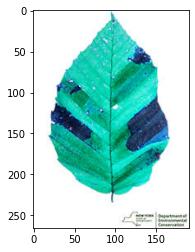

In [8]:
img = cv2.imread("c.jfif")
plt.imshow(img)

•	Image Pre-processing

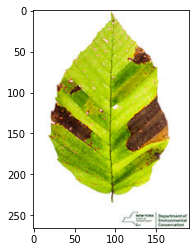

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

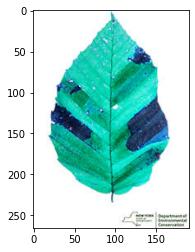

In [10]:
img=cv2.imread('c.jfif')
plt.imshow(img)

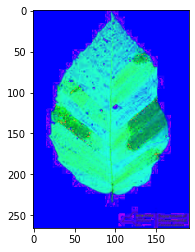

In [11]:
#Converting RGB to HSV
hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImage)

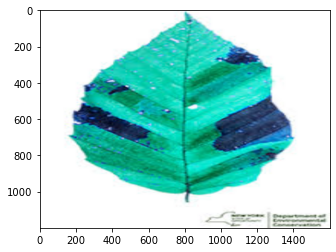

In [12]:
resized_image = cv2.resize(img, (1600, 1200))
plt.imshow(resized_image,cmap="Greys_r")

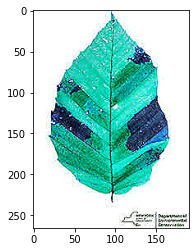

In [13]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(image_sharp)

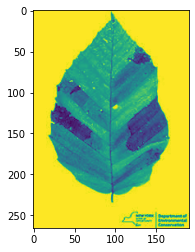

In [14]:
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

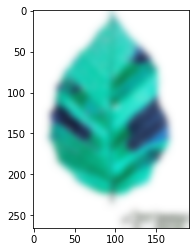

In [15]:
blur = cv2.GaussianBlur(image_sharp, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

Texture Extraction

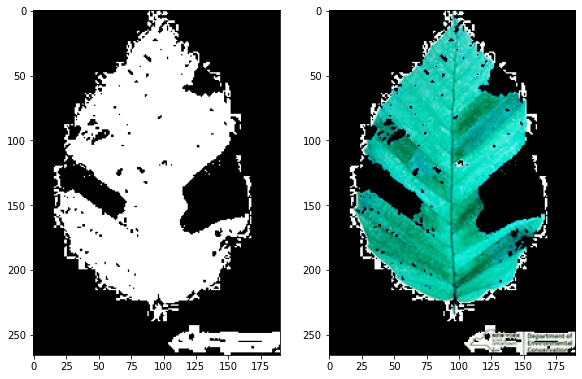

In [16]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])

plt.figure(figsize=(15,15))
mask = cv2.inRange(hsvImage, lower_green, upper_green)
plt.imshow(mask)

result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()
#cv2.countNonZero(result)

#cv2.imwrite('dsa.jpg', mask)

In [17]:
# counting the number of pixels
number_of_white_pix = np.sum(result == 255)
number_of_black_pix = np.sum(result == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 1884
Number of black pixels: 97228


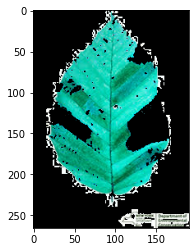

In [18]:
plt.imshow(result)

In [19]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = result
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

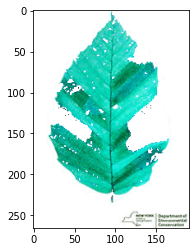

In [20]:
plt.imshow(final_img)

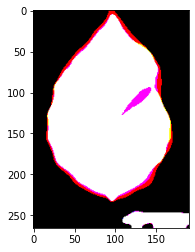

In [21]:
# create a binary thresholded image
_, binary = cv2.threshold(blur, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [22]:
# counting the number of pixels
number_of_white_pix = np.sum(binary == 255)
number_of_black_pix = np.sum(binary == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 73566
Number of black pixels: 78054


In [23]:
#total affected part of the leaf is 
ap=121078-120006
print("Total no.of diseased pixel in the leaf will be =",ap)

Total no.of diseased pixel in the leaf will be = 1072


In [24]:
#percent affected part will be
A = (ap*6.25)/100
print("Affected part of the leaf will be =",A,"%")

Affected part of the leaf will be = 67.0 %


Color based features

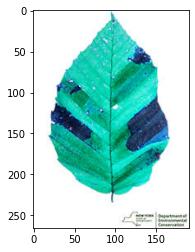

In [25]:
plt.imshow(img,cmap="Greys_r")

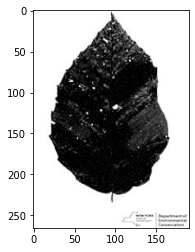

In [26]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

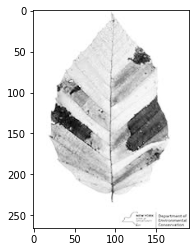

In [27]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

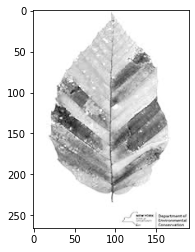

In [28]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [29]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [30]:
red_mean = np.mean(red_channel)
red_mean

24.019568658488325

In [31]:
green_mean = np.mean(green_channel)
green_mean

86.85219628017411

In [32]:
blue_mean = np.mean(green_channel)
blue_mean

86.85219628017411

In [33]:
red_var = np.std(red_channel)
red_var

58.80779220101291

In [34]:
!pip install mahotas

In [35]:
import mahotas as mt

In [36]:
textures = mt.features.haralick(img)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 2.41646971e-01,  6.43566520e+03,  6.09432463e-01,  8.14134050e+03,
        5.14619909e-01,  1.36321003e+02,  2.61296968e+04,  5.41502426e+00,
        8.01614448e+00,  9.83506244e-04,  4.50170433e+00, -2.60704285e-01,
        9.48729514e-01])

In [37]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

6435.6652020049305
0.6094324633042413
0.5146199086794365
8.016144477723023


# Identification using SVM

In [38]:
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

In [39]:
# load the training dataset
train_path = "Path_to_/Input/PlantVillage"
train_names = os.listdir(train_path)

# empty list to hold feature vectors and train labels
train_features = []
train_labels = []

In [40]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

In [41]:
# loop over the training dataset
print("[STATUS] Started extracting haralick textures..")
for train_name in train_names:
        cur_path = 'Path_to_/Input/PlantVillage' + "/" + train_name
        cur_label = train_name
        i = 1
        for file in glob.glob(cur_path + "/*.jpg"):
                print("Processing Image - {} in {}".format(i, cur_label))
                # read the training image
                image = cv2.imread(file)

                # convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # extract haralick texture from the image
                features = extract_features(gray)

                # append the feature vector and label
                train_features.append(features)
                train_labels.append(cur_label)

                # show loop update
                i += 1

[STATUS] Started extracting haralick textures..
Processing Image - 1 in Pepper__bell___Bacterial_spot
Processing Image - 2 in Pepper__bell___Bacterial_spot
Processing Image - 3 in Pepper__bell___Bacterial_spot
Processing Image - 4 in Pepper__bell___Bacterial_spot
Processing Image - 5 in Pepper__bell___Bacterial_spot
Processing Image - 6 in Pepper__bell___Bacterial_spot
Processing Image - 7 in Pepper__bell___Bacterial_spot
Processing Image - 8 in Pepper__bell___Bacterial_spot
Processing Image - 9 in Pepper__bell___Bacterial_spot
Processing Image - 10 in Pepper__bell___Bacterial_spot
Processing Image - 11 in Pepper__bell___Bacterial_spot
Processing Image - 12 in Pepper__bell___Bacterial_spot
Processing Image - 13 in Pepper__bell___Bacterial_spot
Processing Image - 14 in Pepper__bell___Bacterial_spot
Processing Image - 15 in Pepper__bell___Bacterial_spot
Processing Image - 16 in Pepper__bell___Bacterial_spot
Processing Image - 17 in Pepper__bell___Bacterial_spot
Processing Image - 18 in P

Processing Image - 151 in Pepper__bell___Bacterial_spot
Processing Image - 152 in Pepper__bell___Bacterial_spot
Processing Image - 153 in Pepper__bell___Bacterial_spot
Processing Image - 154 in Pepper__bell___Bacterial_spot
Processing Image - 155 in Pepper__bell___Bacterial_spot
Processing Image - 156 in Pepper__bell___Bacterial_spot
Processing Image - 157 in Pepper__bell___Bacterial_spot
Processing Image - 158 in Pepper__bell___Bacterial_spot
Processing Image - 159 in Pepper__bell___Bacterial_spot
Processing Image - 160 in Pepper__bell___Bacterial_spot
Processing Image - 161 in Pepper__bell___Bacterial_spot
Processing Image - 162 in Pepper__bell___Bacterial_spot
Processing Image - 163 in Pepper__bell___Bacterial_spot
Processing Image - 164 in Pepper__bell___Bacterial_spot
Processing Image - 165 in Pepper__bell___Bacterial_spot
Processing Image - 166 in Pepper__bell___Bacterial_spot
Processing Image - 167 in Pepper__bell___Bacterial_spot
Processing Image - 168 in Pepper__bell___Bacteri

Processing Image - 302 in Pepper__bell___Bacterial_spot
Processing Image - 303 in Pepper__bell___Bacterial_spot
Processing Image - 304 in Pepper__bell___Bacterial_spot
Processing Image - 305 in Pepper__bell___Bacterial_spot
Processing Image - 306 in Pepper__bell___Bacterial_spot
Processing Image - 307 in Pepper__bell___Bacterial_spot
Processing Image - 308 in Pepper__bell___Bacterial_spot
Processing Image - 309 in Pepper__bell___Bacterial_spot
Processing Image - 310 in Pepper__bell___Bacterial_spot
Processing Image - 311 in Pepper__bell___Bacterial_spot
Processing Image - 312 in Pepper__bell___Bacterial_spot
Processing Image - 313 in Pepper__bell___Bacterial_spot
Processing Image - 314 in Pepper__bell___Bacterial_spot
Processing Image - 315 in Pepper__bell___Bacterial_spot
Processing Image - 316 in Pepper__bell___Bacterial_spot
Processing Image - 317 in Pepper__bell___Bacterial_spot
Processing Image - 318 in Pepper__bell___Bacterial_spot
Processing Image - 319 in Pepper__bell___Bacteri

Processing Image - 451 in Pepper__bell___Bacterial_spot
Processing Image - 452 in Pepper__bell___Bacterial_spot
Processing Image - 453 in Pepper__bell___Bacterial_spot
Processing Image - 454 in Pepper__bell___Bacterial_spot
Processing Image - 455 in Pepper__bell___Bacterial_spot
Processing Image - 456 in Pepper__bell___Bacterial_spot
Processing Image - 457 in Pepper__bell___Bacterial_spot
Processing Image - 458 in Pepper__bell___Bacterial_spot
Processing Image - 459 in Pepper__bell___Bacterial_spot
Processing Image - 460 in Pepper__bell___Bacterial_spot
Processing Image - 461 in Pepper__bell___Bacterial_spot
Processing Image - 462 in Pepper__bell___Bacterial_spot
Processing Image - 463 in Pepper__bell___Bacterial_spot
Processing Image - 464 in Pepper__bell___Bacterial_spot
Processing Image - 465 in Pepper__bell___Bacterial_spot
Processing Image - 466 in Pepper__bell___Bacterial_spot
Processing Image - 467 in Pepper__bell___Bacterial_spot
Processing Image - 468 in Pepper__bell___Bacteri

Processing Image - 598 in Pepper__bell___Bacterial_spot
Processing Image - 599 in Pepper__bell___Bacterial_spot
Processing Image - 600 in Pepper__bell___Bacterial_spot
Processing Image - 601 in Pepper__bell___Bacterial_spot
Processing Image - 602 in Pepper__bell___Bacterial_spot
Processing Image - 603 in Pepper__bell___Bacterial_spot
Processing Image - 604 in Pepper__bell___Bacterial_spot
Processing Image - 605 in Pepper__bell___Bacterial_spot
Processing Image - 606 in Pepper__bell___Bacterial_spot
Processing Image - 607 in Pepper__bell___Bacterial_spot
Processing Image - 608 in Pepper__bell___Bacterial_spot
Processing Image - 609 in Pepper__bell___Bacterial_spot
Processing Image - 610 in Pepper__bell___Bacterial_spot
Processing Image - 611 in Pepper__bell___Bacterial_spot
Processing Image - 612 in Pepper__bell___Bacterial_spot
Processing Image - 613 in Pepper__bell___Bacterial_spot
Processing Image - 614 in Pepper__bell___Bacterial_spot
Processing Image - 615 in Pepper__bell___Bacteri

Processing Image - 746 in Pepper__bell___Bacterial_spot
Processing Image - 747 in Pepper__bell___Bacterial_spot
Processing Image - 748 in Pepper__bell___Bacterial_spot
Processing Image - 749 in Pepper__bell___Bacterial_spot
Processing Image - 750 in Pepper__bell___Bacterial_spot
Processing Image - 751 in Pepper__bell___Bacterial_spot
Processing Image - 752 in Pepper__bell___Bacterial_spot
Processing Image - 753 in Pepper__bell___Bacterial_spot
Processing Image - 754 in Pepper__bell___Bacterial_spot
Processing Image - 755 in Pepper__bell___Bacterial_spot
Processing Image - 756 in Pepper__bell___Bacterial_spot
Processing Image - 757 in Pepper__bell___Bacterial_spot
Processing Image - 758 in Pepper__bell___Bacterial_spot
Processing Image - 759 in Pepper__bell___Bacterial_spot
Processing Image - 760 in Pepper__bell___Bacterial_spot
Processing Image - 761 in Pepper__bell___Bacterial_spot
Processing Image - 762 in Pepper__bell___Bacterial_spot
Processing Image - 763 in Pepper__bell___Bacteri

Processing Image - 896 in Pepper__bell___Bacterial_spot
Processing Image - 897 in Pepper__bell___Bacterial_spot
Processing Image - 898 in Pepper__bell___Bacterial_spot
Processing Image - 899 in Pepper__bell___Bacterial_spot
Processing Image - 900 in Pepper__bell___Bacterial_spot
Processing Image - 901 in Pepper__bell___Bacterial_spot
Processing Image - 902 in Pepper__bell___Bacterial_spot
Processing Image - 903 in Pepper__bell___Bacterial_spot
Processing Image - 904 in Pepper__bell___Bacterial_spot
Processing Image - 905 in Pepper__bell___Bacterial_spot
Processing Image - 906 in Pepper__bell___Bacterial_spot
Processing Image - 907 in Pepper__bell___Bacterial_spot
Processing Image - 908 in Pepper__bell___Bacterial_spot
Processing Image - 909 in Pepper__bell___Bacterial_spot
Processing Image - 910 in Pepper__bell___Bacterial_spot
Processing Image - 911 in Pepper__bell___Bacterial_spot
Processing Image - 912 in Pepper__bell___Bacterial_spot
Processing Image - 913 in Pepper__bell___Bacteri

Processing Image - 57 in Pepper__bell___healthy
Processing Image - 58 in Pepper__bell___healthy
Processing Image - 59 in Pepper__bell___healthy
Processing Image - 60 in Pepper__bell___healthy
Processing Image - 61 in Pepper__bell___healthy
Processing Image - 62 in Pepper__bell___healthy
Processing Image - 63 in Pepper__bell___healthy
Processing Image - 64 in Pepper__bell___healthy
Processing Image - 65 in Pepper__bell___healthy
Processing Image - 66 in Pepper__bell___healthy
Processing Image - 67 in Pepper__bell___healthy
Processing Image - 68 in Pepper__bell___healthy
Processing Image - 69 in Pepper__bell___healthy
Processing Image - 70 in Pepper__bell___healthy
Processing Image - 71 in Pepper__bell___healthy
Processing Image - 72 in Pepper__bell___healthy
Processing Image - 73 in Pepper__bell___healthy
Processing Image - 74 in Pepper__bell___healthy
Processing Image - 75 in Pepper__bell___healthy
Processing Image - 76 in Pepper__bell___healthy
Processing Image - 77 in Pepper__bell___

Processing Image - 231 in Pepper__bell___healthy
Processing Image - 232 in Pepper__bell___healthy
Processing Image - 233 in Pepper__bell___healthy
Processing Image - 234 in Pepper__bell___healthy
Processing Image - 235 in Pepper__bell___healthy
Processing Image - 236 in Pepper__bell___healthy
Processing Image - 237 in Pepper__bell___healthy
Processing Image - 238 in Pepper__bell___healthy
Processing Image - 239 in Pepper__bell___healthy
Processing Image - 240 in Pepper__bell___healthy
Processing Image - 241 in Pepper__bell___healthy
Processing Image - 242 in Pepper__bell___healthy
Processing Image - 243 in Pepper__bell___healthy
Processing Image - 244 in Pepper__bell___healthy
Processing Image - 245 in Pepper__bell___healthy
Processing Image - 246 in Pepper__bell___healthy
Processing Image - 247 in Pepper__bell___healthy
Processing Image - 248 in Pepper__bell___healthy
Processing Image - 249 in Pepper__bell___healthy
Processing Image - 250 in Pepper__bell___healthy
Processing Image - 2

Processing Image - 403 in Pepper__bell___healthy
Processing Image - 404 in Pepper__bell___healthy
Processing Image - 405 in Pepper__bell___healthy
Processing Image - 406 in Pepper__bell___healthy
Processing Image - 407 in Pepper__bell___healthy
Processing Image - 408 in Pepper__bell___healthy
Processing Image - 409 in Pepper__bell___healthy
Processing Image - 410 in Pepper__bell___healthy
Processing Image - 411 in Pepper__bell___healthy
Processing Image - 412 in Pepper__bell___healthy
Processing Image - 413 in Pepper__bell___healthy
Processing Image - 414 in Pepper__bell___healthy
Processing Image - 415 in Pepper__bell___healthy
Processing Image - 416 in Pepper__bell___healthy
Processing Image - 417 in Pepper__bell___healthy
Processing Image - 418 in Pepper__bell___healthy
Processing Image - 419 in Pepper__bell___healthy
Processing Image - 420 in Pepper__bell___healthy
Processing Image - 421 in Pepper__bell___healthy
Processing Image - 422 in Pepper__bell___healthy
Processing Image - 4

Processing Image - 578 in Pepper__bell___healthy
Processing Image - 579 in Pepper__bell___healthy
Processing Image - 580 in Pepper__bell___healthy
Processing Image - 581 in Pepper__bell___healthy
Processing Image - 582 in Pepper__bell___healthy
Processing Image - 583 in Pepper__bell___healthy
Processing Image - 584 in Pepper__bell___healthy
Processing Image - 585 in Pepper__bell___healthy
Processing Image - 586 in Pepper__bell___healthy
Processing Image - 587 in Pepper__bell___healthy
Processing Image - 588 in Pepper__bell___healthy
Processing Image - 589 in Pepper__bell___healthy
Processing Image - 590 in Pepper__bell___healthy
Processing Image - 591 in Pepper__bell___healthy
Processing Image - 592 in Pepper__bell___healthy
Processing Image - 593 in Pepper__bell___healthy
Processing Image - 594 in Pepper__bell___healthy
Processing Image - 595 in Pepper__bell___healthy
Processing Image - 596 in Pepper__bell___healthy
Processing Image - 597 in Pepper__bell___healthy
Processing Image - 5

Processing Image - 749 in Pepper__bell___healthy
Processing Image - 750 in Pepper__bell___healthy
Processing Image - 751 in Pepper__bell___healthy
Processing Image - 752 in Pepper__bell___healthy
Processing Image - 753 in Pepper__bell___healthy
Processing Image - 754 in Pepper__bell___healthy
Processing Image - 755 in Pepper__bell___healthy
Processing Image - 756 in Pepper__bell___healthy
Processing Image - 757 in Pepper__bell___healthy
Processing Image - 758 in Pepper__bell___healthy
Processing Image - 759 in Pepper__bell___healthy
Processing Image - 760 in Pepper__bell___healthy
Processing Image - 761 in Pepper__bell___healthy
Processing Image - 762 in Pepper__bell___healthy
Processing Image - 763 in Pepper__bell___healthy
Processing Image - 764 in Pepper__bell___healthy
Processing Image - 765 in Pepper__bell___healthy
Processing Image - 766 in Pepper__bell___healthy
Processing Image - 767 in Pepper__bell___healthy
Processing Image - 768 in Pepper__bell___healthy
Processing Image - 7

Processing Image - 917 in Pepper__bell___healthy
Processing Image - 918 in Pepper__bell___healthy
Processing Image - 919 in Pepper__bell___healthy
Processing Image - 920 in Pepper__bell___healthy
Processing Image - 921 in Pepper__bell___healthy
Processing Image - 922 in Pepper__bell___healthy
Processing Image - 923 in Pepper__bell___healthy
Processing Image - 924 in Pepper__bell___healthy
Processing Image - 925 in Pepper__bell___healthy
Processing Image - 926 in Pepper__bell___healthy
Processing Image - 927 in Pepper__bell___healthy
Processing Image - 928 in Pepper__bell___healthy
Processing Image - 929 in Pepper__bell___healthy
Processing Image - 930 in Pepper__bell___healthy
Processing Image - 931 in Pepper__bell___healthy
Processing Image - 932 in Pepper__bell___healthy
Processing Image - 933 in Pepper__bell___healthy
Processing Image - 934 in Pepper__bell___healthy
Processing Image - 935 in Pepper__bell___healthy
Processing Image - 936 in Pepper__bell___healthy
Processing Image - 9

Processing Image - 1089 in Pepper__bell___healthy
Processing Image - 1090 in Pepper__bell___healthy
Processing Image - 1091 in Pepper__bell___healthy
Processing Image - 1092 in Pepper__bell___healthy
Processing Image - 1093 in Pepper__bell___healthy
Processing Image - 1094 in Pepper__bell___healthy
Processing Image - 1095 in Pepper__bell___healthy
Processing Image - 1096 in Pepper__bell___healthy
Processing Image - 1097 in Pepper__bell___healthy
Processing Image - 1098 in Pepper__bell___healthy
Processing Image - 1099 in Pepper__bell___healthy
Processing Image - 1100 in Pepper__bell___healthy
Processing Image - 1101 in Pepper__bell___healthy
Processing Image - 1102 in Pepper__bell___healthy
Processing Image - 1103 in Pepper__bell___healthy
Processing Image - 1104 in Pepper__bell___healthy
Processing Image - 1105 in Pepper__bell___healthy
Processing Image - 1106 in Pepper__bell___healthy
Processing Image - 1107 in Pepper__bell___healthy
Processing Image - 1108 in Pepper__bell___healthy


Processing Image - 1260 in Pepper__bell___healthy
Processing Image - 1261 in Pepper__bell___healthy
Processing Image - 1262 in Pepper__bell___healthy
Processing Image - 1263 in Pepper__bell___healthy
Processing Image - 1264 in Pepper__bell___healthy
Processing Image - 1265 in Pepper__bell___healthy
Processing Image - 1266 in Pepper__bell___healthy
Processing Image - 1267 in Pepper__bell___healthy
Processing Image - 1268 in Pepper__bell___healthy
Processing Image - 1269 in Pepper__bell___healthy
Processing Image - 1270 in Pepper__bell___healthy
Processing Image - 1271 in Pepper__bell___healthy
Processing Image - 1272 in Pepper__bell___healthy
Processing Image - 1273 in Pepper__bell___healthy
Processing Image - 1274 in Pepper__bell___healthy
Processing Image - 1275 in Pepper__bell___healthy
Processing Image - 1276 in Pepper__bell___healthy
Processing Image - 1277 in Pepper__bell___healthy
Processing Image - 1278 in Pepper__bell___healthy
Processing Image - 1279 in Pepper__bell___healthy


Processing Image - 1426 in Pepper__bell___healthy
Processing Image - 1427 in Pepper__bell___healthy
Processing Image - 1428 in Pepper__bell___healthy
Processing Image - 1429 in Pepper__bell___healthy
Processing Image - 1430 in Pepper__bell___healthy
Processing Image - 1431 in Pepper__bell___healthy
Processing Image - 1432 in Pepper__bell___healthy
Processing Image - 1433 in Pepper__bell___healthy
Processing Image - 1434 in Pepper__bell___healthy
Processing Image - 1435 in Pepper__bell___healthy
Processing Image - 1436 in Pepper__bell___healthy
Processing Image - 1437 in Pepper__bell___healthy
Processing Image - 1438 in Pepper__bell___healthy
Processing Image - 1439 in Pepper__bell___healthy
Processing Image - 1440 in Pepper__bell___healthy
Processing Image - 1441 in Pepper__bell___healthy
Processing Image - 1442 in Pepper__bell___healthy
Processing Image - 1443 in Pepper__bell___healthy
Processing Image - 1444 in Pepper__bell___healthy
Processing Image - 1445 in Pepper__bell___healthy


Processing Image - 125 in Potato___Early_blight
Processing Image - 126 in Potato___Early_blight
Processing Image - 127 in Potato___Early_blight
Processing Image - 128 in Potato___Early_blight
Processing Image - 129 in Potato___Early_blight
Processing Image - 130 in Potato___Early_blight
Processing Image - 131 in Potato___Early_blight
Processing Image - 132 in Potato___Early_blight
Processing Image - 133 in Potato___Early_blight
Processing Image - 134 in Potato___Early_blight
Processing Image - 135 in Potato___Early_blight
Processing Image - 136 in Potato___Early_blight
Processing Image - 137 in Potato___Early_blight
Processing Image - 138 in Potato___Early_blight
Processing Image - 139 in Potato___Early_blight
Processing Image - 140 in Potato___Early_blight
Processing Image - 141 in Potato___Early_blight
Processing Image - 142 in Potato___Early_blight
Processing Image - 143 in Potato___Early_blight
Processing Image - 144 in Potato___Early_blight
Processing Image - 145 in Potato___Early

Processing Image - 300 in Potato___Early_blight
Processing Image - 301 in Potato___Early_blight
Processing Image - 302 in Potato___Early_blight
Processing Image - 303 in Potato___Early_blight
Processing Image - 304 in Potato___Early_blight
Processing Image - 305 in Potato___Early_blight
Processing Image - 306 in Potato___Early_blight
Processing Image - 307 in Potato___Early_blight
Processing Image - 308 in Potato___Early_blight
Processing Image - 309 in Potato___Early_blight
Processing Image - 310 in Potato___Early_blight
Processing Image - 311 in Potato___Early_blight
Processing Image - 312 in Potato___Early_blight
Processing Image - 313 in Potato___Early_blight
Processing Image - 314 in Potato___Early_blight
Processing Image - 315 in Potato___Early_blight
Processing Image - 316 in Potato___Early_blight
Processing Image - 317 in Potato___Early_blight
Processing Image - 318 in Potato___Early_blight
Processing Image - 319 in Potato___Early_blight
Processing Image - 320 in Potato___Early

Processing Image - 477 in Potato___Early_blight
Processing Image - 478 in Potato___Early_blight
Processing Image - 479 in Potato___Early_blight
Processing Image - 480 in Potato___Early_blight
Processing Image - 481 in Potato___Early_blight
Processing Image - 482 in Potato___Early_blight
Processing Image - 483 in Potato___Early_blight
Processing Image - 484 in Potato___Early_blight
Processing Image - 485 in Potato___Early_blight
Processing Image - 486 in Potato___Early_blight
Processing Image - 487 in Potato___Early_blight
Processing Image - 488 in Potato___Early_blight
Processing Image - 489 in Potato___Early_blight
Processing Image - 490 in Potato___Early_blight
Processing Image - 491 in Potato___Early_blight
Processing Image - 492 in Potato___Early_blight
Processing Image - 493 in Potato___Early_blight
Processing Image - 494 in Potato___Early_blight
Processing Image - 495 in Potato___Early_blight
Processing Image - 496 in Potato___Early_blight
Processing Image - 497 in Potato___Early

Processing Image - 649 in Potato___Early_blight
Processing Image - 650 in Potato___Early_blight
Processing Image - 651 in Potato___Early_blight
Processing Image - 652 in Potato___Early_blight
Processing Image - 653 in Potato___Early_blight
Processing Image - 654 in Potato___Early_blight
Processing Image - 655 in Potato___Early_blight
Processing Image - 656 in Potato___Early_blight
Processing Image - 657 in Potato___Early_blight
Processing Image - 658 in Potato___Early_blight
Processing Image - 659 in Potato___Early_blight
Processing Image - 660 in Potato___Early_blight
Processing Image - 661 in Potato___Early_blight
Processing Image - 662 in Potato___Early_blight
Processing Image - 663 in Potato___Early_blight
Processing Image - 664 in Potato___Early_blight
Processing Image - 665 in Potato___Early_blight
Processing Image - 666 in Potato___Early_blight
Processing Image - 667 in Potato___Early_blight
Processing Image - 668 in Potato___Early_blight
Processing Image - 669 in Potato___Early

Processing Image - 822 in Potato___Early_blight
Processing Image - 823 in Potato___Early_blight
Processing Image - 824 in Potato___Early_blight
Processing Image - 825 in Potato___Early_blight
Processing Image - 826 in Potato___Early_blight
Processing Image - 827 in Potato___Early_blight
Processing Image - 828 in Potato___Early_blight
Processing Image - 829 in Potato___Early_blight
Processing Image - 830 in Potato___Early_blight
Processing Image - 831 in Potato___Early_blight
Processing Image - 832 in Potato___Early_blight
Processing Image - 833 in Potato___Early_blight
Processing Image - 834 in Potato___Early_blight
Processing Image - 835 in Potato___Early_blight
Processing Image - 836 in Potato___Early_blight
Processing Image - 837 in Potato___Early_blight
Processing Image - 838 in Potato___Early_blight
Processing Image - 839 in Potato___Early_blight
Processing Image - 840 in Potato___Early_blight
Processing Image - 841 in Potato___Early_blight
Processing Image - 842 in Potato___Early

Processing Image - 995 in Potato___Early_blight
Processing Image - 996 in Potato___Early_blight
Processing Image - 997 in Potato___Early_blight
Processing Image - 998 in Potato___Early_blight
Processing Image - 999 in Potato___Early_blight
Processing Image - 1000 in Potato___Early_blight
Processing Image - 1 in Potato___healthy
Processing Image - 2 in Potato___healthy
Processing Image - 3 in Potato___healthy
Processing Image - 4 in Potato___healthy
Processing Image - 5 in Potato___healthy
Processing Image - 6 in Potato___healthy
Processing Image - 7 in Potato___healthy
Processing Image - 8 in Potato___healthy
Processing Image - 9 in Potato___healthy
Processing Image - 10 in Potato___healthy
Processing Image - 11 in Potato___healthy
Processing Image - 12 in Potato___healthy
Processing Image - 13 in Potato___healthy
Processing Image - 14 in Potato___healthy
Processing Image - 15 in Potato___healthy
Processing Image - 16 in Potato___healthy
Processing Image - 17 in Potato___healthy
Proces

Processing Image - 37 in Potato___Late_blight
Processing Image - 38 in Potato___Late_blight
Processing Image - 39 in Potato___Late_blight
Processing Image - 40 in Potato___Late_blight
Processing Image - 41 in Potato___Late_blight
Processing Image - 42 in Potato___Late_blight
Processing Image - 43 in Potato___Late_blight
Processing Image - 44 in Potato___Late_blight
Processing Image - 45 in Potato___Late_blight
Processing Image - 46 in Potato___Late_blight
Processing Image - 47 in Potato___Late_blight
Processing Image - 48 in Potato___Late_blight
Processing Image - 49 in Potato___Late_blight
Processing Image - 50 in Potato___Late_blight
Processing Image - 51 in Potato___Late_blight
Processing Image - 52 in Potato___Late_blight
Processing Image - 53 in Potato___Late_blight
Processing Image - 54 in Potato___Late_blight
Processing Image - 55 in Potato___Late_blight
Processing Image - 56 in Potato___Late_blight
Processing Image - 57 in Potato___Late_blight
Processing Image - 58 in Potato___

Processing Image - 217 in Potato___Late_blight
Processing Image - 218 in Potato___Late_blight
Processing Image - 219 in Potato___Late_blight
Processing Image - 220 in Potato___Late_blight
Processing Image - 221 in Potato___Late_blight
Processing Image - 222 in Potato___Late_blight
Processing Image - 223 in Potato___Late_blight
Processing Image - 224 in Potato___Late_blight
Processing Image - 225 in Potato___Late_blight
Processing Image - 226 in Potato___Late_blight
Processing Image - 227 in Potato___Late_blight
Processing Image - 228 in Potato___Late_blight
Processing Image - 229 in Potato___Late_blight
Processing Image - 230 in Potato___Late_blight
Processing Image - 231 in Potato___Late_blight
Processing Image - 232 in Potato___Late_blight
Processing Image - 233 in Potato___Late_blight
Processing Image - 234 in Potato___Late_blight
Processing Image - 235 in Potato___Late_blight
Processing Image - 236 in Potato___Late_blight
Processing Image - 237 in Potato___Late_blight
Processing Im

Processing Image - 396 in Potato___Late_blight
Processing Image - 397 in Potato___Late_blight
Processing Image - 398 in Potato___Late_blight
Processing Image - 399 in Potato___Late_blight
Processing Image - 400 in Potato___Late_blight
Processing Image - 401 in Potato___Late_blight
Processing Image - 402 in Potato___Late_blight
Processing Image - 403 in Potato___Late_blight
Processing Image - 404 in Potato___Late_blight
Processing Image - 405 in Potato___Late_blight
Processing Image - 406 in Potato___Late_blight
Processing Image - 407 in Potato___Late_blight
Processing Image - 408 in Potato___Late_blight
Processing Image - 409 in Potato___Late_blight
Processing Image - 410 in Potato___Late_blight
Processing Image - 411 in Potato___Late_blight
Processing Image - 412 in Potato___Late_blight
Processing Image - 413 in Potato___Late_blight
Processing Image - 414 in Potato___Late_blight
Processing Image - 415 in Potato___Late_blight
Processing Image - 416 in Potato___Late_blight
Processing Im

Processing Image - 578 in Potato___Late_blight
Processing Image - 579 in Potato___Late_blight
Processing Image - 580 in Potato___Late_blight
Processing Image - 581 in Potato___Late_blight
Processing Image - 582 in Potato___Late_blight
Processing Image - 583 in Potato___Late_blight
Processing Image - 584 in Potato___Late_blight
Processing Image - 585 in Potato___Late_blight
Processing Image - 586 in Potato___Late_blight
Processing Image - 587 in Potato___Late_blight
Processing Image - 588 in Potato___Late_blight
Processing Image - 589 in Potato___Late_blight
Processing Image - 590 in Potato___Late_blight
Processing Image - 591 in Potato___Late_blight
Processing Image - 592 in Potato___Late_blight
Processing Image - 593 in Potato___Late_blight
Processing Image - 594 in Potato___Late_blight
Processing Image - 595 in Potato___Late_blight
Processing Image - 596 in Potato___Late_blight
Processing Image - 597 in Potato___Late_blight
Processing Image - 598 in Potato___Late_blight
Processing Im

Processing Image - 755 in Potato___Late_blight
Processing Image - 756 in Potato___Late_blight
Processing Image - 757 in Potato___Late_blight
Processing Image - 758 in Potato___Late_blight
Processing Image - 759 in Potato___Late_blight
Processing Image - 760 in Potato___Late_blight
Processing Image - 761 in Potato___Late_blight
Processing Image - 762 in Potato___Late_blight
Processing Image - 763 in Potato___Late_blight
Processing Image - 764 in Potato___Late_blight
Processing Image - 765 in Potato___Late_blight
Processing Image - 766 in Potato___Late_blight
Processing Image - 767 in Potato___Late_blight
Processing Image - 768 in Potato___Late_blight
Processing Image - 769 in Potato___Late_blight
Processing Image - 770 in Potato___Late_blight
Processing Image - 771 in Potato___Late_blight
Processing Image - 772 in Potato___Late_blight
Processing Image - 773 in Potato___Late_blight
Processing Image - 774 in Potato___Late_blight
Processing Image - 775 in Potato___Late_blight
Processing Im

Processing Image - 931 in Potato___Late_blight
Processing Image - 932 in Potato___Late_blight
Processing Image - 933 in Potato___Late_blight
Processing Image - 934 in Potato___Late_blight
Processing Image - 935 in Potato___Late_blight
Processing Image - 936 in Potato___Late_blight
Processing Image - 937 in Potato___Late_blight
Processing Image - 938 in Potato___Late_blight
Processing Image - 939 in Potato___Late_blight
Processing Image - 940 in Potato___Late_blight
Processing Image - 941 in Potato___Late_blight
Processing Image - 942 in Potato___Late_blight
Processing Image - 943 in Potato___Late_blight
Processing Image - 944 in Potato___Late_blight
Processing Image - 945 in Potato___Late_blight
Processing Image - 946 in Potato___Late_blight
Processing Image - 947 in Potato___Late_blight
Processing Image - 948 in Potato___Late_blight
Processing Image - 949 in Potato___Late_blight
Processing Image - 950 in Potato___Late_blight
Processing Image - 951 in Potato___Late_blight
Processing Im

Processing Image - 108 in Tomato_Bacterial_spot
Processing Image - 109 in Tomato_Bacterial_spot
Processing Image - 110 in Tomato_Bacterial_spot
Processing Image - 111 in Tomato_Bacterial_spot
Processing Image - 112 in Tomato_Bacterial_spot
Processing Image - 113 in Tomato_Bacterial_spot
Processing Image - 114 in Tomato_Bacterial_spot
Processing Image - 115 in Tomato_Bacterial_spot
Processing Image - 116 in Tomato_Bacterial_spot
Processing Image - 117 in Tomato_Bacterial_spot
Processing Image - 118 in Tomato_Bacterial_spot
Processing Image - 119 in Tomato_Bacterial_spot
Processing Image - 120 in Tomato_Bacterial_spot
Processing Image - 121 in Tomato_Bacterial_spot
Processing Image - 122 in Tomato_Bacterial_spot
Processing Image - 123 in Tomato_Bacterial_spot
Processing Image - 124 in Tomato_Bacterial_spot
Processing Image - 125 in Tomato_Bacterial_spot
Processing Image - 126 in Tomato_Bacterial_spot
Processing Image - 127 in Tomato_Bacterial_spot
Processing Image - 128 in Tomato_Bacteri

Processing Image - 279 in Tomato_Bacterial_spot
Processing Image - 280 in Tomato_Bacterial_spot
Processing Image - 281 in Tomato_Bacterial_spot
Processing Image - 282 in Tomato_Bacterial_spot
Processing Image - 283 in Tomato_Bacterial_spot
Processing Image - 284 in Tomato_Bacterial_spot
Processing Image - 285 in Tomato_Bacterial_spot
Processing Image - 286 in Tomato_Bacterial_spot
Processing Image - 287 in Tomato_Bacterial_spot
Processing Image - 288 in Tomato_Bacterial_spot
Processing Image - 289 in Tomato_Bacterial_spot
Processing Image - 290 in Tomato_Bacterial_spot
Processing Image - 291 in Tomato_Bacterial_spot
Processing Image - 292 in Tomato_Bacterial_spot
Processing Image - 293 in Tomato_Bacterial_spot
Processing Image - 294 in Tomato_Bacterial_spot
Processing Image - 295 in Tomato_Bacterial_spot
Processing Image - 296 in Tomato_Bacterial_spot
Processing Image - 297 in Tomato_Bacterial_spot
Processing Image - 298 in Tomato_Bacterial_spot
Processing Image - 299 in Tomato_Bacteri

Processing Image - 458 in Tomato_Bacterial_spot
Processing Image - 459 in Tomato_Bacterial_spot
Processing Image - 460 in Tomato_Bacterial_spot
Processing Image - 461 in Tomato_Bacterial_spot
Processing Image - 462 in Tomato_Bacterial_spot
Processing Image - 463 in Tomato_Bacterial_spot
Processing Image - 464 in Tomato_Bacterial_spot
Processing Image - 465 in Tomato_Bacterial_spot
Processing Image - 466 in Tomato_Bacterial_spot
Processing Image - 467 in Tomato_Bacterial_spot
Processing Image - 468 in Tomato_Bacterial_spot
Processing Image - 469 in Tomato_Bacterial_spot
Processing Image - 470 in Tomato_Bacterial_spot
Processing Image - 471 in Tomato_Bacterial_spot
Processing Image - 472 in Tomato_Bacterial_spot
Processing Image - 473 in Tomato_Bacterial_spot
Processing Image - 474 in Tomato_Bacterial_spot
Processing Image - 475 in Tomato_Bacterial_spot
Processing Image - 476 in Tomato_Bacterial_spot
Processing Image - 477 in Tomato_Bacterial_spot
Processing Image - 478 in Tomato_Bacteri

Processing Image - 631 in Tomato_Bacterial_spot
Processing Image - 632 in Tomato_Bacterial_spot
Processing Image - 633 in Tomato_Bacterial_spot
Processing Image - 634 in Tomato_Bacterial_spot
Processing Image - 635 in Tomato_Bacterial_spot
Processing Image - 636 in Tomato_Bacterial_spot
Processing Image - 637 in Tomato_Bacterial_spot
Processing Image - 638 in Tomato_Bacterial_spot
Processing Image - 639 in Tomato_Bacterial_spot
Processing Image - 640 in Tomato_Bacterial_spot
Processing Image - 641 in Tomato_Bacterial_spot
Processing Image - 642 in Tomato_Bacterial_spot
Processing Image - 643 in Tomato_Bacterial_spot
Processing Image - 644 in Tomato_Bacterial_spot
Processing Image - 645 in Tomato_Bacterial_spot
Processing Image - 646 in Tomato_Bacterial_spot
Processing Image - 647 in Tomato_Bacterial_spot
Processing Image - 648 in Tomato_Bacterial_spot
Processing Image - 649 in Tomato_Bacterial_spot
Processing Image - 650 in Tomato_Bacterial_spot
Processing Image - 651 in Tomato_Bacteri

Processing Image - 802 in Tomato_Bacterial_spot
Processing Image - 803 in Tomato_Bacterial_spot
Processing Image - 804 in Tomato_Bacterial_spot
Processing Image - 805 in Tomato_Bacterial_spot
Processing Image - 806 in Tomato_Bacterial_spot
Processing Image - 807 in Tomato_Bacterial_spot
Processing Image - 808 in Tomato_Bacterial_spot
Processing Image - 809 in Tomato_Bacterial_spot
Processing Image - 810 in Tomato_Bacterial_spot
Processing Image - 811 in Tomato_Bacterial_spot
Processing Image - 812 in Tomato_Bacterial_spot
Processing Image - 813 in Tomato_Bacterial_spot
Processing Image - 814 in Tomato_Bacterial_spot
Processing Image - 815 in Tomato_Bacterial_spot
Processing Image - 816 in Tomato_Bacterial_spot
Processing Image - 817 in Tomato_Bacterial_spot
Processing Image - 818 in Tomato_Bacterial_spot
Processing Image - 819 in Tomato_Bacterial_spot
Processing Image - 820 in Tomato_Bacterial_spot
Processing Image - 821 in Tomato_Bacterial_spot
Processing Image - 822 in Tomato_Bacteri

Processing Image - 973 in Tomato_Bacterial_spot
Processing Image - 974 in Tomato_Bacterial_spot
Processing Image - 975 in Tomato_Bacterial_spot
Processing Image - 976 in Tomato_Bacterial_spot
Processing Image - 977 in Tomato_Bacterial_spot
Processing Image - 978 in Tomato_Bacterial_spot
Processing Image - 979 in Tomato_Bacterial_spot
Processing Image - 980 in Tomato_Bacterial_spot
Processing Image - 981 in Tomato_Bacterial_spot
Processing Image - 982 in Tomato_Bacterial_spot
Processing Image - 983 in Tomato_Bacterial_spot
Processing Image - 984 in Tomato_Bacterial_spot
Processing Image - 985 in Tomato_Bacterial_spot
Processing Image - 986 in Tomato_Bacterial_spot
Processing Image - 987 in Tomato_Bacterial_spot
Processing Image - 988 in Tomato_Bacterial_spot
Processing Image - 989 in Tomato_Bacterial_spot
Processing Image - 990 in Tomato_Bacterial_spot
Processing Image - 991 in Tomato_Bacterial_spot
Processing Image - 992 in Tomato_Bacterial_spot
Processing Image - 993 in Tomato_Bacteri

Processing Image - 1143 in Tomato_Bacterial_spot
Processing Image - 1144 in Tomato_Bacterial_spot
Processing Image - 1145 in Tomato_Bacterial_spot
Processing Image - 1146 in Tomato_Bacterial_spot
Processing Image - 1147 in Tomato_Bacterial_spot
Processing Image - 1148 in Tomato_Bacterial_spot
Processing Image - 1149 in Tomato_Bacterial_spot
Processing Image - 1150 in Tomato_Bacterial_spot
Processing Image - 1151 in Tomato_Bacterial_spot
Processing Image - 1152 in Tomato_Bacterial_spot
Processing Image - 1153 in Tomato_Bacterial_spot
Processing Image - 1154 in Tomato_Bacterial_spot
Processing Image - 1155 in Tomato_Bacterial_spot
Processing Image - 1156 in Tomato_Bacterial_spot
Processing Image - 1157 in Tomato_Bacterial_spot
Processing Image - 1158 in Tomato_Bacterial_spot
Processing Image - 1159 in Tomato_Bacterial_spot
Processing Image - 1160 in Tomato_Bacterial_spot
Processing Image - 1161 in Tomato_Bacterial_spot
Processing Image - 1162 in Tomato_Bacterial_spot
Processing Image - 1

Processing Image - 1316 in Tomato_Bacterial_spot
Processing Image - 1317 in Tomato_Bacterial_spot
Processing Image - 1318 in Tomato_Bacterial_spot
Processing Image - 1319 in Tomato_Bacterial_spot
Processing Image - 1320 in Tomato_Bacterial_spot
Processing Image - 1321 in Tomato_Bacterial_spot
Processing Image - 1322 in Tomato_Bacterial_spot
Processing Image - 1323 in Tomato_Bacterial_spot
Processing Image - 1324 in Tomato_Bacterial_spot
Processing Image - 1325 in Tomato_Bacterial_spot
Processing Image - 1326 in Tomato_Bacterial_spot
Processing Image - 1327 in Tomato_Bacterial_spot
Processing Image - 1328 in Tomato_Bacterial_spot
Processing Image - 1329 in Tomato_Bacterial_spot
Processing Image - 1330 in Tomato_Bacterial_spot
Processing Image - 1331 in Tomato_Bacterial_spot
Processing Image - 1332 in Tomato_Bacterial_spot
Processing Image - 1333 in Tomato_Bacterial_spot
Processing Image - 1334 in Tomato_Bacterial_spot
Processing Image - 1335 in Tomato_Bacterial_spot
Processing Image - 1

Processing Image - 1487 in Tomato_Bacterial_spot
Processing Image - 1488 in Tomato_Bacterial_spot
Processing Image - 1489 in Tomato_Bacterial_spot
Processing Image - 1490 in Tomato_Bacterial_spot
Processing Image - 1491 in Tomato_Bacterial_spot
Processing Image - 1492 in Tomato_Bacterial_spot
Processing Image - 1493 in Tomato_Bacterial_spot
Processing Image - 1494 in Tomato_Bacterial_spot
Processing Image - 1495 in Tomato_Bacterial_spot
Processing Image - 1496 in Tomato_Bacterial_spot
Processing Image - 1497 in Tomato_Bacterial_spot
Processing Image - 1498 in Tomato_Bacterial_spot
Processing Image - 1499 in Tomato_Bacterial_spot
Processing Image - 1500 in Tomato_Bacterial_spot
Processing Image - 1501 in Tomato_Bacterial_spot
Processing Image - 1502 in Tomato_Bacterial_spot
Processing Image - 1503 in Tomato_Bacterial_spot
Processing Image - 1504 in Tomato_Bacterial_spot
Processing Image - 1505 in Tomato_Bacterial_spot
Processing Image - 1506 in Tomato_Bacterial_spot
Processing Image - 1

Processing Image - 1658 in Tomato_Bacterial_spot
Processing Image - 1659 in Tomato_Bacterial_spot
Processing Image - 1660 in Tomato_Bacterial_spot
Processing Image - 1661 in Tomato_Bacterial_spot
Processing Image - 1662 in Tomato_Bacterial_spot
Processing Image - 1663 in Tomato_Bacterial_spot
Processing Image - 1664 in Tomato_Bacterial_spot
Processing Image - 1665 in Tomato_Bacterial_spot
Processing Image - 1666 in Tomato_Bacterial_spot
Processing Image - 1667 in Tomato_Bacterial_spot
Processing Image - 1668 in Tomato_Bacterial_spot
Processing Image - 1669 in Tomato_Bacterial_spot
Processing Image - 1670 in Tomato_Bacterial_spot
Processing Image - 1671 in Tomato_Bacterial_spot
Processing Image - 1672 in Tomato_Bacterial_spot
Processing Image - 1673 in Tomato_Bacterial_spot
Processing Image - 1674 in Tomato_Bacterial_spot
Processing Image - 1675 in Tomato_Bacterial_spot
Processing Image - 1676 in Tomato_Bacterial_spot
Processing Image - 1677 in Tomato_Bacterial_spot
Processing Image - 1

Processing Image - 1829 in Tomato_Bacterial_spot
Processing Image - 1830 in Tomato_Bacterial_spot
Processing Image - 1831 in Tomato_Bacterial_spot
Processing Image - 1832 in Tomato_Bacterial_spot
Processing Image - 1833 in Tomato_Bacterial_spot
Processing Image - 1834 in Tomato_Bacterial_spot
Processing Image - 1835 in Tomato_Bacterial_spot
Processing Image - 1836 in Tomato_Bacterial_spot
Processing Image - 1837 in Tomato_Bacterial_spot
Processing Image - 1838 in Tomato_Bacterial_spot
Processing Image - 1839 in Tomato_Bacterial_spot
Processing Image - 1840 in Tomato_Bacterial_spot
Processing Image - 1841 in Tomato_Bacterial_spot
Processing Image - 1842 in Tomato_Bacterial_spot
Processing Image - 1843 in Tomato_Bacterial_spot
Processing Image - 1844 in Tomato_Bacterial_spot
Processing Image - 1845 in Tomato_Bacterial_spot
Processing Image - 1846 in Tomato_Bacterial_spot
Processing Image - 1847 in Tomato_Bacterial_spot
Processing Image - 1848 in Tomato_Bacterial_spot
Processing Image - 1

Processing Image - 2000 in Tomato_Bacterial_spot
Processing Image - 2001 in Tomato_Bacterial_spot
Processing Image - 2002 in Tomato_Bacterial_spot
Processing Image - 2003 in Tomato_Bacterial_spot
Processing Image - 2004 in Tomato_Bacterial_spot
Processing Image - 2005 in Tomato_Bacterial_spot
Processing Image - 2006 in Tomato_Bacterial_spot
Processing Image - 2007 in Tomato_Bacterial_spot
Processing Image - 2008 in Tomato_Bacterial_spot
Processing Image - 2009 in Tomato_Bacterial_spot
Processing Image - 2010 in Tomato_Bacterial_spot
Processing Image - 2011 in Tomato_Bacterial_spot
Processing Image - 2012 in Tomato_Bacterial_spot
Processing Image - 2013 in Tomato_Bacterial_spot
Processing Image - 2014 in Tomato_Bacterial_spot
Processing Image - 2015 in Tomato_Bacterial_spot
Processing Image - 2016 in Tomato_Bacterial_spot
Processing Image - 2017 in Tomato_Bacterial_spot
Processing Image - 2018 in Tomato_Bacterial_spot
Processing Image - 2019 in Tomato_Bacterial_spot
Processing Image - 2

Processing Image - 47 in Tomato_Early_blight
Processing Image - 48 in Tomato_Early_blight
Processing Image - 49 in Tomato_Early_blight
Processing Image - 50 in Tomato_Early_blight
Processing Image - 51 in Tomato_Early_blight
Processing Image - 52 in Tomato_Early_blight
Processing Image - 53 in Tomato_Early_blight
Processing Image - 54 in Tomato_Early_blight
Processing Image - 55 in Tomato_Early_blight
Processing Image - 56 in Tomato_Early_blight
Processing Image - 57 in Tomato_Early_blight
Processing Image - 58 in Tomato_Early_blight
Processing Image - 59 in Tomato_Early_blight
Processing Image - 60 in Tomato_Early_blight
Processing Image - 61 in Tomato_Early_blight
Processing Image - 62 in Tomato_Early_blight
Processing Image - 63 in Tomato_Early_blight
Processing Image - 64 in Tomato_Early_blight
Processing Image - 65 in Tomato_Early_blight
Processing Image - 66 in Tomato_Early_blight
Processing Image - 67 in Tomato_Early_blight
Processing Image - 68 in Tomato_Early_blight
Processing

Processing Image - 231 in Tomato_Early_blight
Processing Image - 232 in Tomato_Early_blight
Processing Image - 233 in Tomato_Early_blight
Processing Image - 234 in Tomato_Early_blight
Processing Image - 235 in Tomato_Early_blight
Processing Image - 236 in Tomato_Early_blight
Processing Image - 237 in Tomato_Early_blight
Processing Image - 238 in Tomato_Early_blight
Processing Image - 239 in Tomato_Early_blight
Processing Image - 240 in Tomato_Early_blight
Processing Image - 241 in Tomato_Early_blight
Processing Image - 242 in Tomato_Early_blight
Processing Image - 243 in Tomato_Early_blight
Processing Image - 244 in Tomato_Early_blight
Processing Image - 245 in Tomato_Early_blight
Processing Image - 246 in Tomato_Early_blight
Processing Image - 247 in Tomato_Early_blight
Processing Image - 248 in Tomato_Early_blight
Processing Image - 249 in Tomato_Early_blight
Processing Image - 250 in Tomato_Early_blight
Processing Image - 251 in Tomato_Early_blight
Processing Image - 252 in Tomato_E

Processing Image - 414 in Tomato_Early_blight
Processing Image - 415 in Tomato_Early_blight
Processing Image - 416 in Tomato_Early_blight
Processing Image - 417 in Tomato_Early_blight
Processing Image - 418 in Tomato_Early_blight
Processing Image - 419 in Tomato_Early_blight
Processing Image - 420 in Tomato_Early_blight
Processing Image - 421 in Tomato_Early_blight
Processing Image - 422 in Tomato_Early_blight
Processing Image - 423 in Tomato_Early_blight
Processing Image - 424 in Tomato_Early_blight
Processing Image - 425 in Tomato_Early_blight
Processing Image - 426 in Tomato_Early_blight
Processing Image - 427 in Tomato_Early_blight
Processing Image - 428 in Tomato_Early_blight
Processing Image - 429 in Tomato_Early_blight
Processing Image - 430 in Tomato_Early_blight
Processing Image - 431 in Tomato_Early_blight
Processing Image - 432 in Tomato_Early_blight
Processing Image - 433 in Tomato_Early_blight
Processing Image - 434 in Tomato_Early_blight
Processing Image - 435 in Tomato_E

Processing Image - 596 in Tomato_Early_blight
Processing Image - 597 in Tomato_Early_blight
Processing Image - 598 in Tomato_Early_blight
Processing Image - 599 in Tomato_Early_blight
Processing Image - 600 in Tomato_Early_blight
Processing Image - 601 in Tomato_Early_blight
Processing Image - 602 in Tomato_Early_blight
Processing Image - 603 in Tomato_Early_blight
Processing Image - 604 in Tomato_Early_blight
Processing Image - 605 in Tomato_Early_blight
Processing Image - 606 in Tomato_Early_blight
Processing Image - 607 in Tomato_Early_blight
Processing Image - 608 in Tomato_Early_blight
Processing Image - 609 in Tomato_Early_blight
Processing Image - 610 in Tomato_Early_blight
Processing Image - 611 in Tomato_Early_blight
Processing Image - 612 in Tomato_Early_blight
Processing Image - 613 in Tomato_Early_blight
Processing Image - 614 in Tomato_Early_blight
Processing Image - 615 in Tomato_Early_blight
Processing Image - 616 in Tomato_Early_blight
Processing Image - 617 in Tomato_E

Processing Image - 775 in Tomato_Early_blight
Processing Image - 776 in Tomato_Early_blight
Processing Image - 777 in Tomato_Early_blight
Processing Image - 778 in Tomato_Early_blight
Processing Image - 779 in Tomato_Early_blight
Processing Image - 780 in Tomato_Early_blight
Processing Image - 781 in Tomato_Early_blight
Processing Image - 782 in Tomato_Early_blight
Processing Image - 783 in Tomato_Early_blight
Processing Image - 784 in Tomato_Early_blight
Processing Image - 785 in Tomato_Early_blight
Processing Image - 786 in Tomato_Early_blight
Processing Image - 787 in Tomato_Early_blight
Processing Image - 788 in Tomato_Early_blight
Processing Image - 789 in Tomato_Early_blight
Processing Image - 790 in Tomato_Early_blight
Processing Image - 791 in Tomato_Early_blight
Processing Image - 792 in Tomato_Early_blight
Processing Image - 793 in Tomato_Early_blight
Processing Image - 794 in Tomato_Early_blight
Processing Image - 795 in Tomato_Early_blight
Processing Image - 796 in Tomato_E

Processing Image - 954 in Tomato_Early_blight
Processing Image - 955 in Tomato_Early_blight
Processing Image - 956 in Tomato_Early_blight
Processing Image - 957 in Tomato_Early_blight
Processing Image - 958 in Tomato_Early_blight
Processing Image - 959 in Tomato_Early_blight
Processing Image - 960 in Tomato_Early_blight
Processing Image - 961 in Tomato_Early_blight
Processing Image - 962 in Tomato_Early_blight
Processing Image - 963 in Tomato_Early_blight
Processing Image - 964 in Tomato_Early_blight
Processing Image - 965 in Tomato_Early_blight
Processing Image - 966 in Tomato_Early_blight
Processing Image - 967 in Tomato_Early_blight
Processing Image - 968 in Tomato_Early_blight
Processing Image - 969 in Tomato_Early_blight
Processing Image - 970 in Tomato_Early_blight
Processing Image - 971 in Tomato_Early_blight
Processing Image - 972 in Tomato_Early_blight
Processing Image - 973 in Tomato_Early_blight
Processing Image - 974 in Tomato_Early_blight
Processing Image - 975 in Tomato_E

Processing Image - 152 in Tomato_healthy
Processing Image - 153 in Tomato_healthy
Processing Image - 154 in Tomato_healthy
Processing Image - 155 in Tomato_healthy
Processing Image - 156 in Tomato_healthy
Processing Image - 157 in Tomato_healthy
Processing Image - 158 in Tomato_healthy
Processing Image - 159 in Tomato_healthy
Processing Image - 160 in Tomato_healthy
Processing Image - 161 in Tomato_healthy
Processing Image - 162 in Tomato_healthy
Processing Image - 163 in Tomato_healthy
Processing Image - 164 in Tomato_healthy
Processing Image - 165 in Tomato_healthy
Processing Image - 166 in Tomato_healthy
Processing Image - 167 in Tomato_healthy
Processing Image - 168 in Tomato_healthy
Processing Image - 169 in Tomato_healthy
Processing Image - 170 in Tomato_healthy
Processing Image - 171 in Tomato_healthy
Processing Image - 172 in Tomato_healthy
Processing Image - 173 in Tomato_healthy
Processing Image - 174 in Tomato_healthy
Processing Image - 175 in Tomato_healthy
Processing Image

Processing Image - 359 in Tomato_healthy
Processing Image - 360 in Tomato_healthy
Processing Image - 361 in Tomato_healthy
Processing Image - 362 in Tomato_healthy
Processing Image - 363 in Tomato_healthy
Processing Image - 364 in Tomato_healthy
Processing Image - 365 in Tomato_healthy
Processing Image - 366 in Tomato_healthy
Processing Image - 367 in Tomato_healthy
Processing Image - 368 in Tomato_healthy
Processing Image - 369 in Tomato_healthy
Processing Image - 370 in Tomato_healthy
Processing Image - 371 in Tomato_healthy
Processing Image - 372 in Tomato_healthy
Processing Image - 373 in Tomato_healthy
Processing Image - 374 in Tomato_healthy
Processing Image - 375 in Tomato_healthy
Processing Image - 376 in Tomato_healthy
Processing Image - 377 in Tomato_healthy
Processing Image - 378 in Tomato_healthy
Processing Image - 379 in Tomato_healthy
Processing Image - 380 in Tomato_healthy
Processing Image - 381 in Tomato_healthy
Processing Image - 382 in Tomato_healthy
Processing Image

Processing Image - 560 in Tomato_healthy
Processing Image - 561 in Tomato_healthy
Processing Image - 562 in Tomato_healthy
Processing Image - 563 in Tomato_healthy
Processing Image - 564 in Tomato_healthy
Processing Image - 565 in Tomato_healthy
Processing Image - 566 in Tomato_healthy
Processing Image - 567 in Tomato_healthy
Processing Image - 568 in Tomato_healthy
Processing Image - 569 in Tomato_healthy
Processing Image - 570 in Tomato_healthy
Processing Image - 571 in Tomato_healthy
Processing Image - 572 in Tomato_healthy
Processing Image - 573 in Tomato_healthy
Processing Image - 574 in Tomato_healthy
Processing Image - 575 in Tomato_healthy
Processing Image - 576 in Tomato_healthy
Processing Image - 577 in Tomato_healthy
Processing Image - 578 in Tomato_healthy
Processing Image - 579 in Tomato_healthy
Processing Image - 580 in Tomato_healthy
Processing Image - 581 in Tomato_healthy
Processing Image - 582 in Tomato_healthy
Processing Image - 583 in Tomato_healthy
Processing Image

Processing Image - 763 in Tomato_healthy
Processing Image - 764 in Tomato_healthy
Processing Image - 765 in Tomato_healthy
Processing Image - 766 in Tomato_healthy
Processing Image - 767 in Tomato_healthy
Processing Image - 768 in Tomato_healthy
Processing Image - 769 in Tomato_healthy
Processing Image - 770 in Tomato_healthy
Processing Image - 771 in Tomato_healthy
Processing Image - 772 in Tomato_healthy
Processing Image - 773 in Tomato_healthy
Processing Image - 774 in Tomato_healthy
Processing Image - 775 in Tomato_healthy
Processing Image - 776 in Tomato_healthy
Processing Image - 777 in Tomato_healthy
Processing Image - 778 in Tomato_healthy
Processing Image - 779 in Tomato_healthy
Processing Image - 780 in Tomato_healthy
Processing Image - 781 in Tomato_healthy
Processing Image - 782 in Tomato_healthy
Processing Image - 783 in Tomato_healthy
Processing Image - 784 in Tomato_healthy
Processing Image - 785 in Tomato_healthy
Processing Image - 786 in Tomato_healthy
Processing Image

Processing Image - 969 in Tomato_healthy
Processing Image - 970 in Tomato_healthy
Processing Image - 971 in Tomato_healthy
Processing Image - 972 in Tomato_healthy
Processing Image - 973 in Tomato_healthy
Processing Image - 974 in Tomato_healthy
Processing Image - 975 in Tomato_healthy
Processing Image - 976 in Tomato_healthy
Processing Image - 977 in Tomato_healthy
Processing Image - 978 in Tomato_healthy
Processing Image - 979 in Tomato_healthy
Processing Image - 980 in Tomato_healthy
Processing Image - 981 in Tomato_healthy
Processing Image - 982 in Tomato_healthy
Processing Image - 983 in Tomato_healthy
Processing Image - 984 in Tomato_healthy
Processing Image - 985 in Tomato_healthy
Processing Image - 986 in Tomato_healthy
Processing Image - 987 in Tomato_healthy
Processing Image - 988 in Tomato_healthy
Processing Image - 989 in Tomato_healthy
Processing Image - 990 in Tomato_healthy
Processing Image - 991 in Tomato_healthy
Processing Image - 992 in Tomato_healthy
Processing Image

Processing Image - 1168 in Tomato_healthy
Processing Image - 1169 in Tomato_healthy
Processing Image - 1170 in Tomato_healthy
Processing Image - 1171 in Tomato_healthy
Processing Image - 1172 in Tomato_healthy
Processing Image - 1173 in Tomato_healthy
Processing Image - 1174 in Tomato_healthy
Processing Image - 1175 in Tomato_healthy
Processing Image - 1176 in Tomato_healthy
Processing Image - 1177 in Tomato_healthy
Processing Image - 1178 in Tomato_healthy
Processing Image - 1179 in Tomato_healthy
Processing Image - 1180 in Tomato_healthy
Processing Image - 1181 in Tomato_healthy
Processing Image - 1182 in Tomato_healthy
Processing Image - 1183 in Tomato_healthy
Processing Image - 1184 in Tomato_healthy
Processing Image - 1185 in Tomato_healthy
Processing Image - 1186 in Tomato_healthy
Processing Image - 1187 in Tomato_healthy
Processing Image - 1188 in Tomato_healthy
Processing Image - 1189 in Tomato_healthy
Processing Image - 1190 in Tomato_healthy
Processing Image - 1191 in Tomato_

Processing Image - 1366 in Tomato_healthy
Processing Image - 1367 in Tomato_healthy
Processing Image - 1368 in Tomato_healthy
Processing Image - 1369 in Tomato_healthy
Processing Image - 1370 in Tomato_healthy
Processing Image - 1371 in Tomato_healthy
Processing Image - 1372 in Tomato_healthy
Processing Image - 1373 in Tomato_healthy
Processing Image - 1374 in Tomato_healthy
Processing Image - 1375 in Tomato_healthy
Processing Image - 1376 in Tomato_healthy
Processing Image - 1377 in Tomato_healthy
Processing Image - 1378 in Tomato_healthy
Processing Image - 1379 in Tomato_healthy
Processing Image - 1380 in Tomato_healthy
Processing Image - 1381 in Tomato_healthy
Processing Image - 1382 in Tomato_healthy
Processing Image - 1383 in Tomato_healthy
Processing Image - 1384 in Tomato_healthy
Processing Image - 1385 in Tomato_healthy
Processing Image - 1386 in Tomato_healthy
Processing Image - 1387 in Tomato_healthy
Processing Image - 1388 in Tomato_healthy
Processing Image - 1389 in Tomato_

Processing Image - 1563 in Tomato_healthy
Processing Image - 1564 in Tomato_healthy
Processing Image - 1565 in Tomato_healthy
Processing Image - 1566 in Tomato_healthy
Processing Image - 1567 in Tomato_healthy
Processing Image - 1568 in Tomato_healthy
Processing Image - 1569 in Tomato_healthy
Processing Image - 1570 in Tomato_healthy
Processing Image - 1571 in Tomato_healthy
Processing Image - 1572 in Tomato_healthy
Processing Image - 1573 in Tomato_healthy
Processing Image - 1574 in Tomato_healthy
Processing Image - 1575 in Tomato_healthy
Processing Image - 1576 in Tomato_healthy
Processing Image - 1577 in Tomato_healthy
Processing Image - 1578 in Tomato_healthy
Processing Image - 1579 in Tomato_healthy
Processing Image - 1580 in Tomato_healthy
Processing Image - 1581 in Tomato_healthy
Processing Image - 1582 in Tomato_healthy
Processing Image - 1583 in Tomato_healthy
Processing Image - 1584 in Tomato_healthy
Processing Image - 1585 in Tomato_healthy
Processing Image - 1586 in Tomato_

Processing Image - 164 in Tomato_Late_blight
Processing Image - 165 in Tomato_Late_blight
Processing Image - 166 in Tomato_Late_blight
Processing Image - 167 in Tomato_Late_blight
Processing Image - 168 in Tomato_Late_blight
Processing Image - 169 in Tomato_Late_blight
Processing Image - 170 in Tomato_Late_blight
Processing Image - 171 in Tomato_Late_blight
Processing Image - 172 in Tomato_Late_blight
Processing Image - 173 in Tomato_Late_blight
Processing Image - 174 in Tomato_Late_blight
Processing Image - 175 in Tomato_Late_blight
Processing Image - 176 in Tomato_Late_blight
Processing Image - 177 in Tomato_Late_blight
Processing Image - 178 in Tomato_Late_blight
Processing Image - 179 in Tomato_Late_blight
Processing Image - 180 in Tomato_Late_blight
Processing Image - 181 in Tomato_Late_blight
Processing Image - 182 in Tomato_Late_blight
Processing Image - 183 in Tomato_Late_blight
Processing Image - 184 in Tomato_Late_blight
Processing Image - 185 in Tomato_Late_blight
Processing

Processing Image - 356 in Tomato_Late_blight
Processing Image - 357 in Tomato_Late_blight
Processing Image - 358 in Tomato_Late_blight
Processing Image - 359 in Tomato_Late_blight
Processing Image - 360 in Tomato_Late_blight
Processing Image - 361 in Tomato_Late_blight
Processing Image - 362 in Tomato_Late_blight
Processing Image - 363 in Tomato_Late_blight
Processing Image - 364 in Tomato_Late_blight
Processing Image - 365 in Tomato_Late_blight
Processing Image - 366 in Tomato_Late_blight
Processing Image - 367 in Tomato_Late_blight
Processing Image - 368 in Tomato_Late_blight
Processing Image - 369 in Tomato_Late_blight
Processing Image - 370 in Tomato_Late_blight
Processing Image - 371 in Tomato_Late_blight
Processing Image - 372 in Tomato_Late_blight
Processing Image - 373 in Tomato_Late_blight
Processing Image - 374 in Tomato_Late_blight
Processing Image - 375 in Tomato_Late_blight
Processing Image - 376 in Tomato_Late_blight
Processing Image - 377 in Tomato_Late_blight
Processing

Processing Image - 542 in Tomato_Late_blight
Processing Image - 543 in Tomato_Late_blight
Processing Image - 544 in Tomato_Late_blight
Processing Image - 545 in Tomato_Late_blight
Processing Image - 546 in Tomato_Late_blight
Processing Image - 547 in Tomato_Late_blight
Processing Image - 548 in Tomato_Late_blight
Processing Image - 549 in Tomato_Late_blight
Processing Image - 550 in Tomato_Late_blight
Processing Image - 551 in Tomato_Late_blight
Processing Image - 552 in Tomato_Late_blight
Processing Image - 553 in Tomato_Late_blight
Processing Image - 554 in Tomato_Late_blight
Processing Image - 555 in Tomato_Late_blight
Processing Image - 556 in Tomato_Late_blight
Processing Image - 557 in Tomato_Late_blight
Processing Image - 558 in Tomato_Late_blight
Processing Image - 559 in Tomato_Late_blight
Processing Image - 560 in Tomato_Late_blight
Processing Image - 561 in Tomato_Late_blight
Processing Image - 562 in Tomato_Late_blight
Processing Image - 563 in Tomato_Late_blight
Processing

Processing Image - 730 in Tomato_Late_blight
Processing Image - 731 in Tomato_Late_blight
Processing Image - 732 in Tomato_Late_blight
Processing Image - 733 in Tomato_Late_blight
Processing Image - 734 in Tomato_Late_blight
Processing Image - 735 in Tomato_Late_blight
Processing Image - 736 in Tomato_Late_blight
Processing Image - 737 in Tomato_Late_blight
Processing Image - 738 in Tomato_Late_blight
Processing Image - 739 in Tomato_Late_blight
Processing Image - 740 in Tomato_Late_blight
Processing Image - 741 in Tomato_Late_blight
Processing Image - 742 in Tomato_Late_blight
Processing Image - 743 in Tomato_Late_blight
Processing Image - 744 in Tomato_Late_blight
Processing Image - 745 in Tomato_Late_blight
Processing Image - 746 in Tomato_Late_blight
Processing Image - 747 in Tomato_Late_blight
Processing Image - 748 in Tomato_Late_blight
Processing Image - 749 in Tomato_Late_blight
Processing Image - 750 in Tomato_Late_blight
Processing Image - 751 in Tomato_Late_blight
Processing

Processing Image - 915 in Tomato_Late_blight
Processing Image - 916 in Tomato_Late_blight
Processing Image - 917 in Tomato_Late_blight
Processing Image - 918 in Tomato_Late_blight
Processing Image - 919 in Tomato_Late_blight
Processing Image - 920 in Tomato_Late_blight
Processing Image - 921 in Tomato_Late_blight
Processing Image - 922 in Tomato_Late_blight
Processing Image - 923 in Tomato_Late_blight
Processing Image - 924 in Tomato_Late_blight
Processing Image - 925 in Tomato_Late_blight
Processing Image - 926 in Tomato_Late_blight
Processing Image - 927 in Tomato_Late_blight
Processing Image - 928 in Tomato_Late_blight
Processing Image - 929 in Tomato_Late_blight
Processing Image - 930 in Tomato_Late_blight
Processing Image - 931 in Tomato_Late_blight
Processing Image - 932 in Tomato_Late_blight
Processing Image - 933 in Tomato_Late_blight
Processing Image - 934 in Tomato_Late_blight
Processing Image - 935 in Tomato_Late_blight
Processing Image - 936 in Tomato_Late_blight
Processing

Processing Image - 1098 in Tomato_Late_blight
Processing Image - 1099 in Tomato_Late_blight
Processing Image - 1100 in Tomato_Late_blight
Processing Image - 1101 in Tomato_Late_blight
Processing Image - 1102 in Tomato_Late_blight
Processing Image - 1103 in Tomato_Late_blight
Processing Image - 1104 in Tomato_Late_blight
Processing Image - 1105 in Tomato_Late_blight
Processing Image - 1106 in Tomato_Late_blight
Processing Image - 1107 in Tomato_Late_blight
Processing Image - 1108 in Tomato_Late_blight
Processing Image - 1109 in Tomato_Late_blight
Processing Image - 1110 in Tomato_Late_blight
Processing Image - 1111 in Tomato_Late_blight
Processing Image - 1112 in Tomato_Late_blight
Processing Image - 1113 in Tomato_Late_blight
Processing Image - 1114 in Tomato_Late_blight
Processing Image - 1115 in Tomato_Late_blight
Processing Image - 1116 in Tomato_Late_blight
Processing Image - 1117 in Tomato_Late_blight
Processing Image - 1118 in Tomato_Late_blight
Processing Image - 1119 in Tomato_

Processing Image - 1278 in Tomato_Late_blight
Processing Image - 1279 in Tomato_Late_blight
Processing Image - 1280 in Tomato_Late_blight
Processing Image - 1281 in Tomato_Late_blight
Processing Image - 1282 in Tomato_Late_blight
Processing Image - 1283 in Tomato_Late_blight
Processing Image - 1284 in Tomato_Late_blight
Processing Image - 1285 in Tomato_Late_blight
Processing Image - 1286 in Tomato_Late_blight
Processing Image - 1287 in Tomato_Late_blight
Processing Image - 1288 in Tomato_Late_blight
Processing Image - 1289 in Tomato_Late_blight
Processing Image - 1290 in Tomato_Late_blight
Processing Image - 1291 in Tomato_Late_blight
Processing Image - 1292 in Tomato_Late_blight
Processing Image - 1293 in Tomato_Late_blight
Processing Image - 1294 in Tomato_Late_blight
Processing Image - 1295 in Tomato_Late_blight
Processing Image - 1296 in Tomato_Late_blight
Processing Image - 1297 in Tomato_Late_blight
Processing Image - 1298 in Tomato_Late_blight
Processing Image - 1299 in Tomato_

Processing Image - 1461 in Tomato_Late_blight
Processing Image - 1462 in Tomato_Late_blight
Processing Image - 1463 in Tomato_Late_blight
Processing Image - 1464 in Tomato_Late_blight
Processing Image - 1465 in Tomato_Late_blight
Processing Image - 1466 in Tomato_Late_blight
Processing Image - 1467 in Tomato_Late_blight
Processing Image - 1468 in Tomato_Late_blight
Processing Image - 1469 in Tomato_Late_blight
Processing Image - 1470 in Tomato_Late_blight
Processing Image - 1471 in Tomato_Late_blight
Processing Image - 1472 in Tomato_Late_blight
Processing Image - 1473 in Tomato_Late_blight
Processing Image - 1474 in Tomato_Late_blight
Processing Image - 1475 in Tomato_Late_blight
Processing Image - 1476 in Tomato_Late_blight
Processing Image - 1477 in Tomato_Late_blight
Processing Image - 1478 in Tomato_Late_blight
Processing Image - 1479 in Tomato_Late_blight
Processing Image - 1480 in Tomato_Late_blight
Processing Image - 1481 in Tomato_Late_blight
Processing Image - 1482 in Tomato_

Processing Image - 1643 in Tomato_Late_blight
Processing Image - 1644 in Tomato_Late_blight
Processing Image - 1645 in Tomato_Late_blight
Processing Image - 1646 in Tomato_Late_blight
Processing Image - 1647 in Tomato_Late_blight
Processing Image - 1648 in Tomato_Late_blight
Processing Image - 1649 in Tomato_Late_blight
Processing Image - 1650 in Tomato_Late_blight
Processing Image - 1651 in Tomato_Late_blight
Processing Image - 1652 in Tomato_Late_blight
Processing Image - 1653 in Tomato_Late_blight
Processing Image - 1654 in Tomato_Late_blight
Processing Image - 1655 in Tomato_Late_blight
Processing Image - 1656 in Tomato_Late_blight
Processing Image - 1657 in Tomato_Late_blight
Processing Image - 1658 in Tomato_Late_blight
Processing Image - 1659 in Tomato_Late_blight
Processing Image - 1660 in Tomato_Late_blight
Processing Image - 1661 in Tomato_Late_blight
Processing Image - 1662 in Tomato_Late_blight
Processing Image - 1663 in Tomato_Late_blight
Processing Image - 1664 in Tomato_

Processing Image - 1827 in Tomato_Late_blight
Processing Image - 1828 in Tomato_Late_blight
Processing Image - 1829 in Tomato_Late_blight
Processing Image - 1830 in Tomato_Late_blight
Processing Image - 1831 in Tomato_Late_blight
Processing Image - 1832 in Tomato_Late_blight
Processing Image - 1833 in Tomato_Late_blight
Processing Image - 1834 in Tomato_Late_blight
Processing Image - 1835 in Tomato_Late_blight
Processing Image - 1836 in Tomato_Late_blight
Processing Image - 1837 in Tomato_Late_blight
Processing Image - 1838 in Tomato_Late_blight
Processing Image - 1839 in Tomato_Late_blight
Processing Image - 1840 in Tomato_Late_blight
Processing Image - 1841 in Tomato_Late_blight
Processing Image - 1842 in Tomato_Late_blight
Processing Image - 1843 in Tomato_Late_blight
Processing Image - 1844 in Tomato_Late_blight
Processing Image - 1845 in Tomato_Late_blight
Processing Image - 1846 in Tomato_Late_blight
Processing Image - 1847 in Tomato_Late_blight
Processing Image - 1848 in Tomato_

Processing Image - 107 in Tomato_Leaf_Mold
Processing Image - 108 in Tomato_Leaf_Mold
Processing Image - 109 in Tomato_Leaf_Mold
Processing Image - 110 in Tomato_Leaf_Mold
Processing Image - 111 in Tomato_Leaf_Mold
Processing Image - 112 in Tomato_Leaf_Mold
Processing Image - 113 in Tomato_Leaf_Mold
Processing Image - 114 in Tomato_Leaf_Mold
Processing Image - 115 in Tomato_Leaf_Mold
Processing Image - 116 in Tomato_Leaf_Mold
Processing Image - 117 in Tomato_Leaf_Mold
Processing Image - 118 in Tomato_Leaf_Mold
Processing Image - 119 in Tomato_Leaf_Mold
Processing Image - 120 in Tomato_Leaf_Mold
Processing Image - 121 in Tomato_Leaf_Mold
Processing Image - 122 in Tomato_Leaf_Mold
Processing Image - 123 in Tomato_Leaf_Mold
Processing Image - 124 in Tomato_Leaf_Mold
Processing Image - 125 in Tomato_Leaf_Mold
Processing Image - 126 in Tomato_Leaf_Mold
Processing Image - 127 in Tomato_Leaf_Mold
Processing Image - 128 in Tomato_Leaf_Mold
Processing Image - 129 in Tomato_Leaf_Mold
Processing 

Processing Image - 300 in Tomato_Leaf_Mold
Processing Image - 301 in Tomato_Leaf_Mold
Processing Image - 302 in Tomato_Leaf_Mold
Processing Image - 303 in Tomato_Leaf_Mold
Processing Image - 304 in Tomato_Leaf_Mold
Processing Image - 305 in Tomato_Leaf_Mold
Processing Image - 306 in Tomato_Leaf_Mold
Processing Image - 307 in Tomato_Leaf_Mold
Processing Image - 308 in Tomato_Leaf_Mold
Processing Image - 309 in Tomato_Leaf_Mold
Processing Image - 310 in Tomato_Leaf_Mold
Processing Image - 311 in Tomato_Leaf_Mold
Processing Image - 312 in Tomato_Leaf_Mold
Processing Image - 313 in Tomato_Leaf_Mold
Processing Image - 314 in Tomato_Leaf_Mold
Processing Image - 315 in Tomato_Leaf_Mold
Processing Image - 316 in Tomato_Leaf_Mold
Processing Image - 317 in Tomato_Leaf_Mold
Processing Image - 318 in Tomato_Leaf_Mold
Processing Image - 319 in Tomato_Leaf_Mold
Processing Image - 320 in Tomato_Leaf_Mold
Processing Image - 321 in Tomato_Leaf_Mold
Processing Image - 322 in Tomato_Leaf_Mold
Processing 

Processing Image - 492 in Tomato_Leaf_Mold
Processing Image - 493 in Tomato_Leaf_Mold
Processing Image - 494 in Tomato_Leaf_Mold
Processing Image - 495 in Tomato_Leaf_Mold
Processing Image - 496 in Tomato_Leaf_Mold
Processing Image - 497 in Tomato_Leaf_Mold
Processing Image - 498 in Tomato_Leaf_Mold
Processing Image - 499 in Tomato_Leaf_Mold
Processing Image - 500 in Tomato_Leaf_Mold
Processing Image - 501 in Tomato_Leaf_Mold
Processing Image - 502 in Tomato_Leaf_Mold
Processing Image - 503 in Tomato_Leaf_Mold
Processing Image - 504 in Tomato_Leaf_Mold
Processing Image - 505 in Tomato_Leaf_Mold
Processing Image - 506 in Tomato_Leaf_Mold
Processing Image - 507 in Tomato_Leaf_Mold
Processing Image - 508 in Tomato_Leaf_Mold
Processing Image - 509 in Tomato_Leaf_Mold
Processing Image - 510 in Tomato_Leaf_Mold
Processing Image - 511 in Tomato_Leaf_Mold
Processing Image - 512 in Tomato_Leaf_Mold
Processing Image - 513 in Tomato_Leaf_Mold
Processing Image - 514 in Tomato_Leaf_Mold
Processing 

Processing Image - 683 in Tomato_Leaf_Mold
Processing Image - 684 in Tomato_Leaf_Mold
Processing Image - 685 in Tomato_Leaf_Mold
Processing Image - 686 in Tomato_Leaf_Mold
Processing Image - 687 in Tomato_Leaf_Mold
Processing Image - 688 in Tomato_Leaf_Mold
Processing Image - 689 in Tomato_Leaf_Mold
Processing Image - 690 in Tomato_Leaf_Mold
Processing Image - 691 in Tomato_Leaf_Mold
Processing Image - 692 in Tomato_Leaf_Mold
Processing Image - 693 in Tomato_Leaf_Mold
Processing Image - 694 in Tomato_Leaf_Mold
Processing Image - 695 in Tomato_Leaf_Mold
Processing Image - 696 in Tomato_Leaf_Mold
Processing Image - 697 in Tomato_Leaf_Mold
Processing Image - 698 in Tomato_Leaf_Mold
Processing Image - 699 in Tomato_Leaf_Mold
Processing Image - 700 in Tomato_Leaf_Mold
Processing Image - 701 in Tomato_Leaf_Mold
Processing Image - 702 in Tomato_Leaf_Mold
Processing Image - 703 in Tomato_Leaf_Mold
Processing Image - 704 in Tomato_Leaf_Mold
Processing Image - 705 in Tomato_Leaf_Mold
Processing 

Processing Image - 875 in Tomato_Leaf_Mold
Processing Image - 876 in Tomato_Leaf_Mold
Processing Image - 877 in Tomato_Leaf_Mold
Processing Image - 878 in Tomato_Leaf_Mold
Processing Image - 879 in Tomato_Leaf_Mold
Processing Image - 880 in Tomato_Leaf_Mold
Processing Image - 881 in Tomato_Leaf_Mold
Processing Image - 882 in Tomato_Leaf_Mold
Processing Image - 883 in Tomato_Leaf_Mold
Processing Image - 884 in Tomato_Leaf_Mold
Processing Image - 885 in Tomato_Leaf_Mold
Processing Image - 886 in Tomato_Leaf_Mold
Processing Image - 887 in Tomato_Leaf_Mold
Processing Image - 888 in Tomato_Leaf_Mold
Processing Image - 889 in Tomato_Leaf_Mold
Processing Image - 890 in Tomato_Leaf_Mold
Processing Image - 891 in Tomato_Leaf_Mold
Processing Image - 892 in Tomato_Leaf_Mold
Processing Image - 893 in Tomato_Leaf_Mold
Processing Image - 894 in Tomato_Leaf_Mold
Processing Image - 895 in Tomato_Leaf_Mold
Processing Image - 896 in Tomato_Leaf_Mold
Processing Image - 897 in Tomato_Leaf_Mold
Processing 

Processing Image - 104 in Tomato_Septoria_leaf_spot
Processing Image - 105 in Tomato_Septoria_leaf_spot
Processing Image - 106 in Tomato_Septoria_leaf_spot
Processing Image - 107 in Tomato_Septoria_leaf_spot
Processing Image - 108 in Tomato_Septoria_leaf_spot
Processing Image - 109 in Tomato_Septoria_leaf_spot
Processing Image - 110 in Tomato_Septoria_leaf_spot
Processing Image - 111 in Tomato_Septoria_leaf_spot
Processing Image - 112 in Tomato_Septoria_leaf_spot
Processing Image - 113 in Tomato_Septoria_leaf_spot
Processing Image - 114 in Tomato_Septoria_leaf_spot
Processing Image - 115 in Tomato_Septoria_leaf_spot
Processing Image - 116 in Tomato_Septoria_leaf_spot
Processing Image - 117 in Tomato_Septoria_leaf_spot
Processing Image - 118 in Tomato_Septoria_leaf_spot
Processing Image - 119 in Tomato_Septoria_leaf_spot
Processing Image - 120 in Tomato_Septoria_leaf_spot
Processing Image - 121 in Tomato_Septoria_leaf_spot
Processing Image - 122 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 263 in Tomato_Septoria_leaf_spot
Processing Image - 264 in Tomato_Septoria_leaf_spot
Processing Image - 265 in Tomato_Septoria_leaf_spot
Processing Image - 266 in Tomato_Septoria_leaf_spot
Processing Image - 267 in Tomato_Septoria_leaf_spot
Processing Image - 268 in Tomato_Septoria_leaf_spot
Processing Image - 269 in Tomato_Septoria_leaf_spot
Processing Image - 270 in Tomato_Septoria_leaf_spot
Processing Image - 271 in Tomato_Septoria_leaf_spot
Processing Image - 272 in Tomato_Septoria_leaf_spot
Processing Image - 273 in Tomato_Septoria_leaf_spot
Processing Image - 274 in Tomato_Septoria_leaf_spot
Processing Image - 275 in Tomato_Septoria_leaf_spot
Processing Image - 276 in Tomato_Septoria_leaf_spot
Processing Image - 277 in Tomato_Septoria_leaf_spot
Processing Image - 278 in Tomato_Septoria_leaf_spot
Processing Image - 279 in Tomato_Septoria_leaf_spot
Processing Image - 280 in Tomato_Septoria_leaf_spot
Processing Image - 281 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 421 in Tomato_Septoria_leaf_spot
Processing Image - 422 in Tomato_Septoria_leaf_spot
Processing Image - 423 in Tomato_Septoria_leaf_spot
Processing Image - 424 in Tomato_Septoria_leaf_spot
Processing Image - 425 in Tomato_Septoria_leaf_spot
Processing Image - 426 in Tomato_Septoria_leaf_spot
Processing Image - 427 in Tomato_Septoria_leaf_spot
Processing Image - 428 in Tomato_Septoria_leaf_spot
Processing Image - 429 in Tomato_Septoria_leaf_spot
Processing Image - 430 in Tomato_Septoria_leaf_spot
Processing Image - 431 in Tomato_Septoria_leaf_spot
Processing Image - 432 in Tomato_Septoria_leaf_spot
Processing Image - 433 in Tomato_Septoria_leaf_spot
Processing Image - 434 in Tomato_Septoria_leaf_spot
Processing Image - 435 in Tomato_Septoria_leaf_spot
Processing Image - 436 in Tomato_Septoria_leaf_spot
Processing Image - 437 in Tomato_Septoria_leaf_spot
Processing Image - 438 in Tomato_Septoria_leaf_spot
Processing Image - 439 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 581 in Tomato_Septoria_leaf_spot
Processing Image - 582 in Tomato_Septoria_leaf_spot
Processing Image - 583 in Tomato_Septoria_leaf_spot
Processing Image - 584 in Tomato_Septoria_leaf_spot
Processing Image - 585 in Tomato_Septoria_leaf_spot
Processing Image - 586 in Tomato_Septoria_leaf_spot
Processing Image - 587 in Tomato_Septoria_leaf_spot
Processing Image - 588 in Tomato_Septoria_leaf_spot
Processing Image - 589 in Tomato_Septoria_leaf_spot
Processing Image - 590 in Tomato_Septoria_leaf_spot
Processing Image - 591 in Tomato_Septoria_leaf_spot
Processing Image - 592 in Tomato_Septoria_leaf_spot
Processing Image - 593 in Tomato_Septoria_leaf_spot
Processing Image - 594 in Tomato_Septoria_leaf_spot
Processing Image - 595 in Tomato_Septoria_leaf_spot
Processing Image - 596 in Tomato_Septoria_leaf_spot
Processing Image - 597 in Tomato_Septoria_leaf_spot
Processing Image - 598 in Tomato_Septoria_leaf_spot
Processing Image - 599 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 742 in Tomato_Septoria_leaf_spot
Processing Image - 743 in Tomato_Septoria_leaf_spot
Processing Image - 744 in Tomato_Septoria_leaf_spot
Processing Image - 745 in Tomato_Septoria_leaf_spot
Processing Image - 746 in Tomato_Septoria_leaf_spot
Processing Image - 747 in Tomato_Septoria_leaf_spot
Processing Image - 748 in Tomato_Septoria_leaf_spot
Processing Image - 749 in Tomato_Septoria_leaf_spot
Processing Image - 750 in Tomato_Septoria_leaf_spot
Processing Image - 751 in Tomato_Septoria_leaf_spot
Processing Image - 752 in Tomato_Septoria_leaf_spot
Processing Image - 753 in Tomato_Septoria_leaf_spot
Processing Image - 754 in Tomato_Septoria_leaf_spot
Processing Image - 755 in Tomato_Septoria_leaf_spot
Processing Image - 756 in Tomato_Septoria_leaf_spot
Processing Image - 757 in Tomato_Septoria_leaf_spot
Processing Image - 758 in Tomato_Septoria_leaf_spot
Processing Image - 759 in Tomato_Septoria_leaf_spot
Processing Image - 760 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 900 in Tomato_Septoria_leaf_spot
Processing Image - 901 in Tomato_Septoria_leaf_spot
Processing Image - 902 in Tomato_Septoria_leaf_spot
Processing Image - 903 in Tomato_Septoria_leaf_spot
Processing Image - 904 in Tomato_Septoria_leaf_spot
Processing Image - 905 in Tomato_Septoria_leaf_spot
Processing Image - 906 in Tomato_Septoria_leaf_spot
Processing Image - 907 in Tomato_Septoria_leaf_spot
Processing Image - 908 in Tomato_Septoria_leaf_spot
Processing Image - 909 in Tomato_Septoria_leaf_spot
Processing Image - 910 in Tomato_Septoria_leaf_spot
Processing Image - 911 in Tomato_Septoria_leaf_spot
Processing Image - 912 in Tomato_Septoria_leaf_spot
Processing Image - 913 in Tomato_Septoria_leaf_spot
Processing Image - 914 in Tomato_Septoria_leaf_spot
Processing Image - 915 in Tomato_Septoria_leaf_spot
Processing Image - 916 in Tomato_Septoria_leaf_spot
Processing Image - 917 in Tomato_Septoria_leaf_spot
Processing Image - 918 in Tomato_Septoria_leaf_spot
Processing I

Processing Image - 1057 in Tomato_Septoria_leaf_spot
Processing Image - 1058 in Tomato_Septoria_leaf_spot
Processing Image - 1059 in Tomato_Septoria_leaf_spot
Processing Image - 1060 in Tomato_Septoria_leaf_spot
Processing Image - 1061 in Tomato_Septoria_leaf_spot
Processing Image - 1062 in Tomato_Septoria_leaf_spot
Processing Image - 1063 in Tomato_Septoria_leaf_spot
Processing Image - 1064 in Tomato_Septoria_leaf_spot
Processing Image - 1065 in Tomato_Septoria_leaf_spot
Processing Image - 1066 in Tomato_Septoria_leaf_spot
Processing Image - 1067 in Tomato_Septoria_leaf_spot
Processing Image - 1068 in Tomato_Septoria_leaf_spot
Processing Image - 1069 in Tomato_Septoria_leaf_spot
Processing Image - 1070 in Tomato_Septoria_leaf_spot
Processing Image - 1071 in Tomato_Septoria_leaf_spot
Processing Image - 1072 in Tomato_Septoria_leaf_spot
Processing Image - 1073 in Tomato_Septoria_leaf_spot
Processing Image - 1074 in Tomato_Septoria_leaf_spot
Processing Image - 1075 in Tomato_Septoria_lea

Processing Image - 1213 in Tomato_Septoria_leaf_spot
Processing Image - 1214 in Tomato_Septoria_leaf_spot
Processing Image - 1215 in Tomato_Septoria_leaf_spot
Processing Image - 1216 in Tomato_Septoria_leaf_spot
Processing Image - 1217 in Tomato_Septoria_leaf_spot
Processing Image - 1218 in Tomato_Septoria_leaf_spot
Processing Image - 1219 in Tomato_Septoria_leaf_spot
Processing Image - 1220 in Tomato_Septoria_leaf_spot
Processing Image - 1221 in Tomato_Septoria_leaf_spot
Processing Image - 1222 in Tomato_Septoria_leaf_spot
Processing Image - 1223 in Tomato_Septoria_leaf_spot
Processing Image - 1224 in Tomato_Septoria_leaf_spot
Processing Image - 1225 in Tomato_Septoria_leaf_spot
Processing Image - 1226 in Tomato_Septoria_leaf_spot
Processing Image - 1227 in Tomato_Septoria_leaf_spot
Processing Image - 1228 in Tomato_Septoria_leaf_spot
Processing Image - 1229 in Tomato_Septoria_leaf_spot
Processing Image - 1230 in Tomato_Septoria_leaf_spot
Processing Image - 1231 in Tomato_Septoria_lea

Processing Image - 1371 in Tomato_Septoria_leaf_spot
Processing Image - 1372 in Tomato_Septoria_leaf_spot
Processing Image - 1373 in Tomato_Septoria_leaf_spot
Processing Image - 1374 in Tomato_Septoria_leaf_spot
Processing Image - 1375 in Tomato_Septoria_leaf_spot
Processing Image - 1376 in Tomato_Septoria_leaf_spot
Processing Image - 1377 in Tomato_Septoria_leaf_spot
Processing Image - 1378 in Tomato_Septoria_leaf_spot
Processing Image - 1379 in Tomato_Septoria_leaf_spot
Processing Image - 1380 in Tomato_Septoria_leaf_spot
Processing Image - 1381 in Tomato_Septoria_leaf_spot
Processing Image - 1382 in Tomato_Septoria_leaf_spot
Processing Image - 1383 in Tomato_Septoria_leaf_spot
Processing Image - 1384 in Tomato_Septoria_leaf_spot
Processing Image - 1385 in Tomato_Septoria_leaf_spot
Processing Image - 1386 in Tomato_Septoria_leaf_spot
Processing Image - 1387 in Tomato_Septoria_leaf_spot
Processing Image - 1388 in Tomato_Septoria_leaf_spot
Processing Image - 1389 in Tomato_Septoria_lea

Processing Image - 1528 in Tomato_Septoria_leaf_spot
Processing Image - 1529 in Tomato_Septoria_leaf_spot
Processing Image - 1530 in Tomato_Septoria_leaf_spot
Processing Image - 1531 in Tomato_Septoria_leaf_spot
Processing Image - 1532 in Tomato_Septoria_leaf_spot
Processing Image - 1533 in Tomato_Septoria_leaf_spot
Processing Image - 1534 in Tomato_Septoria_leaf_spot
Processing Image - 1535 in Tomato_Septoria_leaf_spot
Processing Image - 1536 in Tomato_Septoria_leaf_spot
Processing Image - 1537 in Tomato_Septoria_leaf_spot
Processing Image - 1538 in Tomato_Septoria_leaf_spot
Processing Image - 1539 in Tomato_Septoria_leaf_spot
Processing Image - 1540 in Tomato_Septoria_leaf_spot
Processing Image - 1541 in Tomato_Septoria_leaf_spot
Processing Image - 1542 in Tomato_Septoria_leaf_spot
Processing Image - 1543 in Tomato_Septoria_leaf_spot
Processing Image - 1544 in Tomato_Septoria_leaf_spot
Processing Image - 1545 in Tomato_Septoria_leaf_spot
Processing Image - 1546 in Tomato_Septoria_lea

Processing Image - 1687 in Tomato_Septoria_leaf_spot
Processing Image - 1688 in Tomato_Septoria_leaf_spot
Processing Image - 1689 in Tomato_Septoria_leaf_spot
Processing Image - 1690 in Tomato_Septoria_leaf_spot
Processing Image - 1691 in Tomato_Septoria_leaf_spot
Processing Image - 1692 in Tomato_Septoria_leaf_spot
Processing Image - 1693 in Tomato_Septoria_leaf_spot
Processing Image - 1694 in Tomato_Septoria_leaf_spot
Processing Image - 1695 in Tomato_Septoria_leaf_spot
Processing Image - 1696 in Tomato_Septoria_leaf_spot
Processing Image - 1697 in Tomato_Septoria_leaf_spot
Processing Image - 1698 in Tomato_Septoria_leaf_spot
Processing Image - 1699 in Tomato_Septoria_leaf_spot
Processing Image - 1700 in Tomato_Septoria_leaf_spot
Processing Image - 1701 in Tomato_Septoria_leaf_spot
Processing Image - 1702 in Tomato_Septoria_leaf_spot
Processing Image - 1703 in Tomato_Septoria_leaf_spot
Processing Image - 1704 in Tomato_Septoria_leaf_spot
Processing Image - 1705 in Tomato_Septoria_lea

Processing Image - 60 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 61 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 62 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 63 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 64 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 65 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 66 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 67 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 68 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 69 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 70 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 71 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 72 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 73 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 74 in Tomato_Sp

Processing Image - 181 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 182 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 183 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 184 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 185 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 186 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 187 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 188 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 189 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 190 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 191 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 192 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 193 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 194 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1

Processing Image - 302 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 303 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 304 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 305 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 306 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 307 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 308 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 309 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 310 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 311 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 312 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 313 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 314 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 315 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 3

Processing Image - 424 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 425 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 426 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 427 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 428 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 429 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 430 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 431 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 432 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 433 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 434 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 435 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 436 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 437 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 4

Processing Image - 545 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 546 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 547 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 548 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 549 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 550 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 551 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 552 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 553 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 554 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 555 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 556 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 557 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 558 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 5

Processing Image - 666 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 667 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 668 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 669 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 670 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 671 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 672 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 673 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 674 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 675 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 676 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 677 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 678 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 679 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 6

Processing Image - 786 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 787 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 788 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 789 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 790 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 791 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 792 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 793 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 794 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 795 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 796 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 797 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 798 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 799 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 8

Processing Image - 904 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 905 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 906 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 907 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 908 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 909 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 910 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 911 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 912 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 913 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 914 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 915 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 916 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 917 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 9

Processing Image - 1026 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1027 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1028 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1029 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1030 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1031 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1032 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1033 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1034 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1035 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1036 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1037 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1038 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1039 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 1146 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1147 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1148 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1149 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1150 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1151 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1152 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1153 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1154 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1155 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1156 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1157 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1158 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1159 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 1267 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1268 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1269 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1270 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1271 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1272 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1273 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1274 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1275 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1276 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1277 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1278 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1279 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1280 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 1384 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1385 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1386 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1387 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1388 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1389 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1390 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1391 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1392 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1393 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1394 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1395 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1396 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1397 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 1505 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1506 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1507 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1508 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1509 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1510 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1511 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1512 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1513 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1514 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1515 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1516 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1517 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1518 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 1623 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1624 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1625 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1626 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1627 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1628 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1629 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1630 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1631 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1632 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1633 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1634 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1635 in Tomato_Spider_mites_Two_spotted_spider_mite
Processing Image - 1636 in Tomato_Spider_mites_Two_spotted_spider_mite
Proces

Processing Image - 100 in Tomato__Target_Spot
Processing Image - 101 in Tomato__Target_Spot
Processing Image - 102 in Tomato__Target_Spot
Processing Image - 103 in Tomato__Target_Spot
Processing Image - 104 in Tomato__Target_Spot
Processing Image - 105 in Tomato__Target_Spot
Processing Image - 106 in Tomato__Target_Spot
Processing Image - 107 in Tomato__Target_Spot
Processing Image - 108 in Tomato__Target_Spot
Processing Image - 109 in Tomato__Target_Spot
Processing Image - 110 in Tomato__Target_Spot
Processing Image - 111 in Tomato__Target_Spot
Processing Image - 112 in Tomato__Target_Spot
Processing Image - 113 in Tomato__Target_Spot
Processing Image - 114 in Tomato__Target_Spot
Processing Image - 115 in Tomato__Target_Spot
Processing Image - 116 in Tomato__Target_Spot
Processing Image - 117 in Tomato__Target_Spot
Processing Image - 118 in Tomato__Target_Spot
Processing Image - 119 in Tomato__Target_Spot
Processing Image - 120 in Tomato__Target_Spot
Processing Image - 121 in Tomato__

Processing Image - 281 in Tomato__Target_Spot
Processing Image - 282 in Tomato__Target_Spot
Processing Image - 283 in Tomato__Target_Spot
Processing Image - 284 in Tomato__Target_Spot
Processing Image - 285 in Tomato__Target_Spot
Processing Image - 286 in Tomato__Target_Spot
Processing Image - 287 in Tomato__Target_Spot
Processing Image - 288 in Tomato__Target_Spot
Processing Image - 289 in Tomato__Target_Spot
Processing Image - 290 in Tomato__Target_Spot
Processing Image - 291 in Tomato__Target_Spot
Processing Image - 292 in Tomato__Target_Spot
Processing Image - 293 in Tomato__Target_Spot
Processing Image - 294 in Tomato__Target_Spot
Processing Image - 295 in Tomato__Target_Spot
Processing Image - 296 in Tomato__Target_Spot
Processing Image - 297 in Tomato__Target_Spot
Processing Image - 298 in Tomato__Target_Spot
Processing Image - 299 in Tomato__Target_Spot
Processing Image - 300 in Tomato__Target_Spot
Processing Image - 301 in Tomato__Target_Spot
Processing Image - 302 in Tomato__

Processing Image - 462 in Tomato__Target_Spot
Processing Image - 463 in Tomato__Target_Spot
Processing Image - 464 in Tomato__Target_Spot
Processing Image - 465 in Tomato__Target_Spot
Processing Image - 466 in Tomato__Target_Spot
Processing Image - 467 in Tomato__Target_Spot
Processing Image - 468 in Tomato__Target_Spot
Processing Image - 469 in Tomato__Target_Spot
Processing Image - 470 in Tomato__Target_Spot
Processing Image - 471 in Tomato__Target_Spot
Processing Image - 472 in Tomato__Target_Spot
Processing Image - 473 in Tomato__Target_Spot
Processing Image - 474 in Tomato__Target_Spot
Processing Image - 475 in Tomato__Target_Spot
Processing Image - 476 in Tomato__Target_Spot
Processing Image - 477 in Tomato__Target_Spot
Processing Image - 478 in Tomato__Target_Spot
Processing Image - 479 in Tomato__Target_Spot
Processing Image - 480 in Tomato__Target_Spot
Processing Image - 481 in Tomato__Target_Spot
Processing Image - 482 in Tomato__Target_Spot
Processing Image - 483 in Tomato__

Processing Image - 642 in Tomato__Target_Spot
Processing Image - 643 in Tomato__Target_Spot
Processing Image - 644 in Tomato__Target_Spot
Processing Image - 645 in Tomato__Target_Spot
Processing Image - 646 in Tomato__Target_Spot
Processing Image - 647 in Tomato__Target_Spot
Processing Image - 648 in Tomato__Target_Spot
Processing Image - 649 in Tomato__Target_Spot
Processing Image - 650 in Tomato__Target_Spot
Processing Image - 651 in Tomato__Target_Spot
Processing Image - 652 in Tomato__Target_Spot
Processing Image - 653 in Tomato__Target_Spot
Processing Image - 654 in Tomato__Target_Spot
Processing Image - 655 in Tomato__Target_Spot
Processing Image - 656 in Tomato__Target_Spot
Processing Image - 657 in Tomato__Target_Spot
Processing Image - 658 in Tomato__Target_Spot
Processing Image - 659 in Tomato__Target_Spot
Processing Image - 660 in Tomato__Target_Spot
Processing Image - 661 in Tomato__Target_Spot
Processing Image - 662 in Tomato__Target_Spot
Processing Image - 663 in Tomato__

Processing Image - 821 in Tomato__Target_Spot
Processing Image - 822 in Tomato__Target_Spot
Processing Image - 823 in Tomato__Target_Spot
Processing Image - 824 in Tomato__Target_Spot
Processing Image - 825 in Tomato__Target_Spot
Processing Image - 826 in Tomato__Target_Spot
Processing Image - 827 in Tomato__Target_Spot
Processing Image - 828 in Tomato__Target_Spot
Processing Image - 829 in Tomato__Target_Spot
Processing Image - 830 in Tomato__Target_Spot
Processing Image - 831 in Tomato__Target_Spot
Processing Image - 832 in Tomato__Target_Spot
Processing Image - 833 in Tomato__Target_Spot
Processing Image - 834 in Tomato__Target_Spot
Processing Image - 835 in Tomato__Target_Spot
Processing Image - 836 in Tomato__Target_Spot
Processing Image - 837 in Tomato__Target_Spot
Processing Image - 838 in Tomato__Target_Spot
Processing Image - 839 in Tomato__Target_Spot
Processing Image - 840 in Tomato__Target_Spot
Processing Image - 841 in Tomato__Target_Spot
Processing Image - 842 in Tomato__

Processing Image - 1000 in Tomato__Target_Spot
Processing Image - 1001 in Tomato__Target_Spot
Processing Image - 1002 in Tomato__Target_Spot
Processing Image - 1003 in Tomato__Target_Spot
Processing Image - 1004 in Tomato__Target_Spot
Processing Image - 1005 in Tomato__Target_Spot
Processing Image - 1006 in Tomato__Target_Spot
Processing Image - 1007 in Tomato__Target_Spot
Processing Image - 1008 in Tomato__Target_Spot
Processing Image - 1009 in Tomato__Target_Spot
Processing Image - 1010 in Tomato__Target_Spot
Processing Image - 1011 in Tomato__Target_Spot
Processing Image - 1012 in Tomato__Target_Spot
Processing Image - 1013 in Tomato__Target_Spot
Processing Image - 1014 in Tomato__Target_Spot
Processing Image - 1015 in Tomato__Target_Spot
Processing Image - 1016 in Tomato__Target_Spot
Processing Image - 1017 in Tomato__Target_Spot
Processing Image - 1018 in Tomato__Target_Spot
Processing Image - 1019 in Tomato__Target_Spot
Processing Image - 1020 in Tomato__Target_Spot
Processing Im

Processing Image - 1178 in Tomato__Target_Spot
Processing Image - 1179 in Tomato__Target_Spot
Processing Image - 1180 in Tomato__Target_Spot
Processing Image - 1181 in Tomato__Target_Spot
Processing Image - 1182 in Tomato__Target_Spot
Processing Image - 1183 in Tomato__Target_Spot
Processing Image - 1184 in Tomato__Target_Spot
Processing Image - 1185 in Tomato__Target_Spot
Processing Image - 1186 in Tomato__Target_Spot
Processing Image - 1187 in Tomato__Target_Spot
Processing Image - 1188 in Tomato__Target_Spot
Processing Image - 1189 in Tomato__Target_Spot
Processing Image - 1190 in Tomato__Target_Spot
Processing Image - 1191 in Tomato__Target_Spot
Processing Image - 1192 in Tomato__Target_Spot
Processing Image - 1193 in Tomato__Target_Spot
Processing Image - 1194 in Tomato__Target_Spot
Processing Image - 1195 in Tomato__Target_Spot
Processing Image - 1196 in Tomato__Target_Spot
Processing Image - 1197 in Tomato__Target_Spot
Processing Image - 1198 in Tomato__Target_Spot
Processing Im

Processing Image - 1356 in Tomato__Target_Spot
Processing Image - 1357 in Tomato__Target_Spot
Processing Image - 1358 in Tomato__Target_Spot
Processing Image - 1359 in Tomato__Target_Spot
Processing Image - 1360 in Tomato__Target_Spot
Processing Image - 1361 in Tomato__Target_Spot
Processing Image - 1362 in Tomato__Target_Spot
Processing Image - 1363 in Tomato__Target_Spot
Processing Image - 1364 in Tomato__Target_Spot
Processing Image - 1365 in Tomato__Target_Spot
Processing Image - 1366 in Tomato__Target_Spot
Processing Image - 1367 in Tomato__Target_Spot
Processing Image - 1368 in Tomato__Target_Spot
Processing Image - 1369 in Tomato__Target_Spot
Processing Image - 1370 in Tomato__Target_Spot
Processing Image - 1371 in Tomato__Target_Spot
Processing Image - 1372 in Tomato__Target_Spot
Processing Image - 1373 in Tomato__Target_Spot
Processing Image - 1374 in Tomato__Target_Spot
Processing Image - 1375 in Tomato__Target_Spot
Processing Image - 1376 in Tomato__Target_Spot
Processing Im

Processing Image - 113 in Tomato__Tomato_mosaic_virus
Processing Image - 114 in Tomato__Tomato_mosaic_virus
Processing Image - 115 in Tomato__Tomato_mosaic_virus
Processing Image - 116 in Tomato__Tomato_mosaic_virus
Processing Image - 117 in Tomato__Tomato_mosaic_virus
Processing Image - 118 in Tomato__Tomato_mosaic_virus
Processing Image - 119 in Tomato__Tomato_mosaic_virus
Processing Image - 120 in Tomato__Tomato_mosaic_virus
Processing Image - 121 in Tomato__Tomato_mosaic_virus
Processing Image - 122 in Tomato__Tomato_mosaic_virus
Processing Image - 123 in Tomato__Tomato_mosaic_virus
Processing Image - 124 in Tomato__Tomato_mosaic_virus
Processing Image - 125 in Tomato__Tomato_mosaic_virus
Processing Image - 126 in Tomato__Tomato_mosaic_virus
Processing Image - 127 in Tomato__Tomato_mosaic_virus
Processing Image - 128 in Tomato__Tomato_mosaic_virus
Processing Image - 129 in Tomato__Tomato_mosaic_virus
Processing Image - 130 in Tomato__Tomato_mosaic_virus
Processing Image - 131 in To

Processing Image - 267 in Tomato__Tomato_mosaic_virus
Processing Image - 268 in Tomato__Tomato_mosaic_virus
Processing Image - 269 in Tomato__Tomato_mosaic_virus
Processing Image - 270 in Tomato__Tomato_mosaic_virus
Processing Image - 271 in Tomato__Tomato_mosaic_virus
Processing Image - 272 in Tomato__Tomato_mosaic_virus
Processing Image - 273 in Tomato__Tomato_mosaic_virus
Processing Image - 274 in Tomato__Tomato_mosaic_virus
Processing Image - 275 in Tomato__Tomato_mosaic_virus
Processing Image - 276 in Tomato__Tomato_mosaic_virus
Processing Image - 277 in Tomato__Tomato_mosaic_virus
Processing Image - 278 in Tomato__Tomato_mosaic_virus
Processing Image - 279 in Tomato__Tomato_mosaic_virus
Processing Image - 280 in Tomato__Tomato_mosaic_virus
Processing Image - 281 in Tomato__Tomato_mosaic_virus
Processing Image - 282 in Tomato__Tomato_mosaic_virus
Processing Image - 283 in Tomato__Tomato_mosaic_virus
Processing Image - 284 in Tomato__Tomato_mosaic_virus
Processing Image - 285 in To

Processing Image - 46 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 47 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 48 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 49 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 50 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 51 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 52 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 53 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 54 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 55 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 56 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 57 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 58 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 59 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 60 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 61 in Tomato__Tomato_YellowLeaf__Cur

Processing Image - 182 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 183 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 184 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 185 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 186 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 187 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 188 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 189 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 190 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 191 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 192 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 193 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 194 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 195 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 196 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 197 in Tomato__Tomato

Processing Image - 313 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 314 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 315 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 316 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 317 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 318 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 319 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 320 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 321 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 322 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 323 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 324 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 325 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 326 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 327 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 328 in Tomato__Tomato

Processing Image - 443 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 444 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 445 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 446 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 447 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 448 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 449 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 450 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 451 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 452 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 453 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 454 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 455 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 456 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 457 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 458 in Tomato__Tomato

Processing Image - 582 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 583 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 584 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 585 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 586 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 587 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 588 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 589 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 590 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 591 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 592 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 593 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 594 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 595 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 596 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 597 in Tomato__Tomato

Processing Image - 713 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 714 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 715 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 716 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 717 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 718 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 719 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 720 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 721 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 722 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 723 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 724 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 725 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 726 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 727 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 728 in Tomato__Tomato

Processing Image - 847 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 848 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 849 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 850 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 851 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 852 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 853 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 854 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 855 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 856 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 857 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 858 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 859 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 860 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 861 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 862 in Tomato__Tomato

Processing Image - 979 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 980 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 981 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 982 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 983 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 984 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 985 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 986 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 987 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 988 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 989 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 990 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 991 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 992 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 993 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 994 in Tomato__Tomato

Processing Image - 1106 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1107 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1108 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1109 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1110 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1111 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1112 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1113 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1114 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1115 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1116 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1117 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1118 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1119 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1120 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1121 i

Processing Image - 1236 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1237 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1238 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1239 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1240 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1241 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1242 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1243 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1244 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1245 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1246 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1247 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1248 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1249 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1250 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1251 i

Processing Image - 1365 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1366 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1367 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1368 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1369 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1370 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1371 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1372 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1373 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1374 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1375 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1376 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1377 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1378 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1379 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1380 i

Processing Image - 1497 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1498 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1499 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1500 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1501 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1502 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1503 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1504 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1505 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1506 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1507 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1508 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1509 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1510 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1511 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1512 i

Processing Image - 1628 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1629 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1630 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1631 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1632 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1633 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1634 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1635 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1636 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1637 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1638 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1639 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1640 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1641 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1642 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1643 i

Processing Image - 1755 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1756 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1757 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1758 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1759 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1760 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1761 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1762 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1763 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1764 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1765 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1766 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1767 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1768 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1769 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1770 i

Processing Image - 1887 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1888 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1889 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1890 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1891 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1892 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1893 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1894 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1895 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1896 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1897 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1898 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1899 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1900 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1901 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 1902 i

Processing Image - 2015 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2016 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2017 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2018 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2019 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2020 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2021 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2022 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2023 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2024 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2025 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2026 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2027 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2028 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2029 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2030 i

Processing Image - 2143 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2144 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2145 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2146 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2147 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2148 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2149 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2150 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2151 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2152 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2153 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2154 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2155 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2156 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2157 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2158 i

Processing Image - 2271 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2272 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2273 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2274 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2275 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2276 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2277 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2278 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2279 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2280 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2281 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2282 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2283 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2284 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2285 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2286 i

Processing Image - 2400 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2401 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2402 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2403 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2404 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2405 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2406 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2407 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2408 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2409 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2410 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2411 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2412 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2413 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2414 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2415 i

Processing Image - 2527 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2528 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2529 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2530 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2531 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2532 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2533 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2534 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2535 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2536 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2537 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2538 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2539 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2540 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2541 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2542 i

Processing Image - 2654 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2655 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2656 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2657 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2658 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2659 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2660 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2661 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2662 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2663 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2664 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2665 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2666 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2667 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2668 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2669 i

Processing Image - 2782 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2783 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2784 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2785 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2786 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2787 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2788 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2789 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2790 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2791 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2792 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2793 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2794 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2795 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2796 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2797 i

Processing Image - 2911 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2912 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2913 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2914 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2915 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2916 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2917 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2918 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2919 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2920 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2921 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2922 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2923 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2924 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2925 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 2926 i

Processing Image - 3048 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3049 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3050 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3051 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3052 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3053 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3054 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3055 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3056 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3057 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3058 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3059 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3060 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3061 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3062 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3063 i

Processing Image - 3175 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3176 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3177 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3178 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3179 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3180 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3181 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3182 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3183 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3184 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3185 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3186 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3187 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3188 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3189 in Tomato__Tomato_YellowLeaf__Curl_Virus
Processing Image - 3190 i

In [42]:
# have a look at the size of our feature vector and labels
print("Training features: {}".format(np.array(train_features).shape))
print("Training labels: {}".format(np.array(train_labels).shape))

Training features: (20636, 13)
Training labels: (20636,)


In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
# create the classifier
print("[STATUS] Creating the classifier..")
clf_svm = LinearSVC(random_state=1)

# fit the training data and labels
print("[STATUS] Fitting data/label to model..")
clf_svm.fit(train_features, train_labels)

[STATUS] Creating the classifier..
[STATUS] Fitting data/label to model..


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=1)

In [45]:
# loop over the test images
test_path = "dataset/test"
for file in glob.glob('Path_to_/Input' + "/*.jpg"):
        # read the input image
        image = cv2.imread(file)

        # convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # extract haralick texture from the image
        features = extract_features(gray)

        # evaluate the model and predict label
        prediction = clf_svm.predict(features.reshape(1, -1))[0]

        # show the label
        cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

       # display the output image
        cv2.imshow("Test_Image", image)
        cv2.waitKey(0)

# Checking Accuracy for  Algorithm

In [46]:
df = pd.read_csv('Path_to_/plant_village.csv')

In [47]:
dataset = df.copy()

In [48]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [49]:
X = dataset.iloc[:,:-1]
int_array = X. astype(int)
X =int_array

In [50]:
y = dataset.iloc[:,-1]
int_array = y. astype(int)
y =int_array

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [52]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [53]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [54]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  72.94
F1 (Polynomial Kernel):  70.04


In [55]:
from sklearn import svm

In [56]:
clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train,y_train)

SVC(gamma=0.01)

In [57]:
y_pred = clf.predict(X_test)

In [58]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7338888888888889